In [ ]:
import pandas as pd
import matplotlib.pylab as plt

corona = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')
corona

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/22/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
1,01/23/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2,01/24/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
3,01/25/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
4,01/26/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15775,10/06/2020,PW,0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,10/07/2020 01:45:01 PM,NaN,NaN
15776,10/07/2020,PW,0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,10/08/2020 01:56:57 PM,NaN,NaN
15777,10/08/2020,PW,0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,10/09/2020 01:43:36 PM,NaN,NaN
15778,10/09/2020,PW,0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,10/10/2020 01:30:17 PM,NaN,NaN


In [ ]:
corona.shape

(15780, 15)

In [ ]:
corona.corr()

,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
tot_cases,1.000000,0.998707,0.434427,0.635637,0.066281,0.748472,0.805921,0.523880,0.286076,0.004854
conf_cases,0.998707,1.000000,0.388078,0.482457,0.064825,0.766188,0.786267,0.520991,0.141776,0.007738
prob_cases,0.434427,0.388078,1.000000,0.161420,0.179508,0.291080,0.292092,0.127424,-0.018978,-0.000771
new_case,0.635637,0.482457,0.161420,1.000000,0.184069,0.353670,0.163407,0.045372,0.441539,0.023792
pnew_case,0.066281,0.064825,0.179508,0.184069,1.000000,0.036884,0.011106,0.005798,0.051921,0.073587
tot_death,0.748472,0.766188,0.291080,0.353670,0.036884,1.000000,0.993873,0.863886,0.249664,0.016916
conf_death,0.805921,0.786267,0.292092,0.163407,0.011106,0.993873,1.000000,0.802921,0.153203,0.001923
prob_death,0.523880,0.520991,0.127424,0.045372,0.005798,0.863886,0.802921,1.000000,0.180433,0.088933
new_death,0.286076,0.141776,-0.018978,0.441539,0.051921,0.249664,0.153203,0.180433,1.000000,0.421431
pnew_death,0.004854,0.007738,-0.000771,0.023792,0.073587,0.016916,0.001923,0.088933,0.421431,1.000000


CO


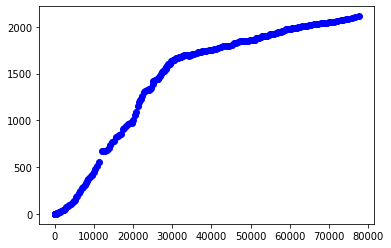

FL


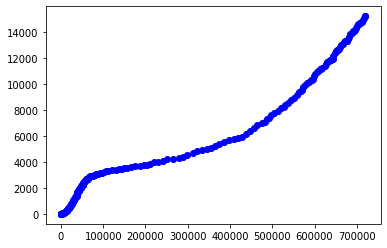

AZ


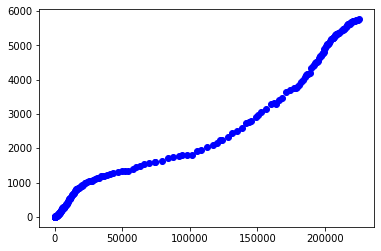

SC


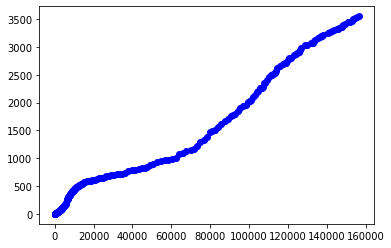

CT


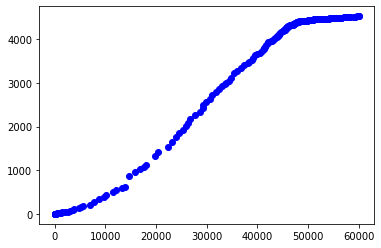

NE


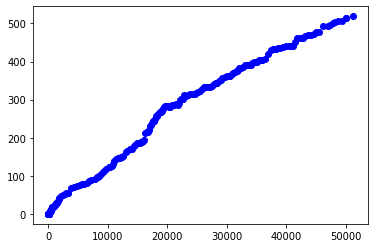

KY


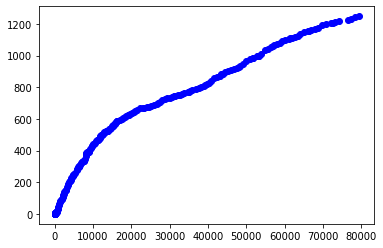

WY


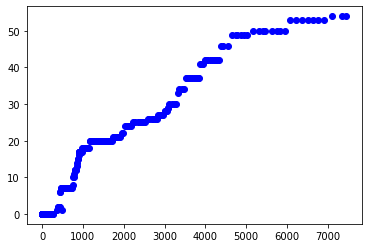

IA


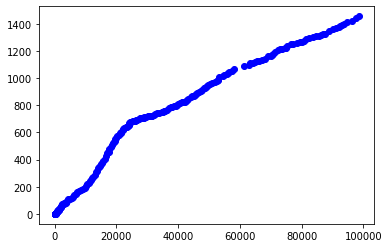

NM


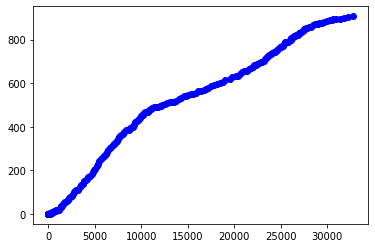

ND


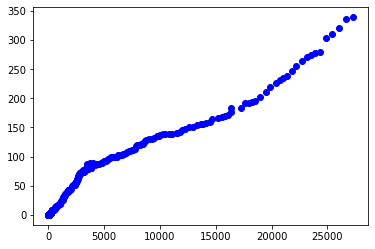

WA


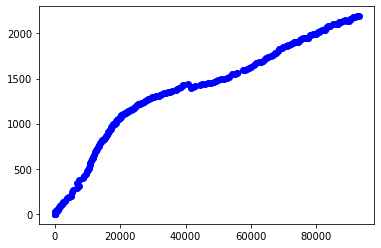

RMI


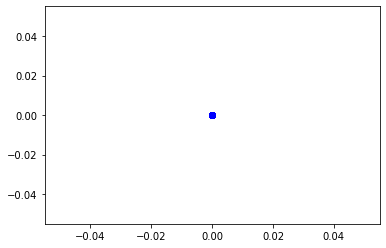

TN


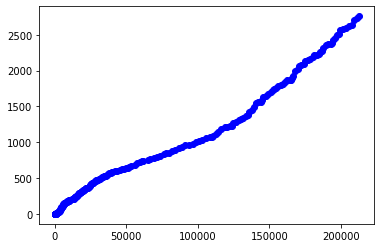

AS


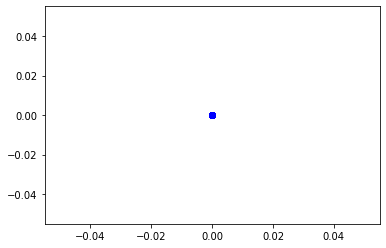

MA


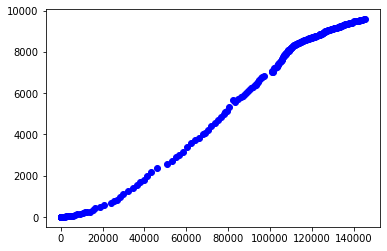

PA


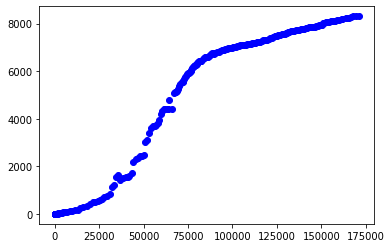

NYC


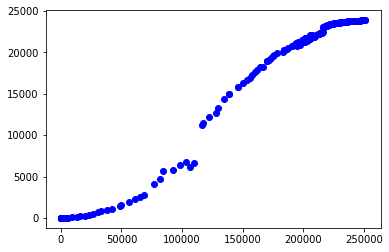

OH


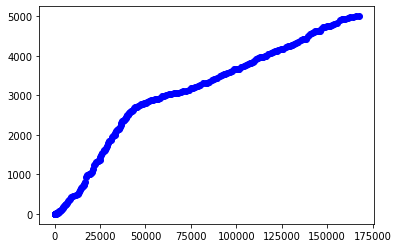

AL


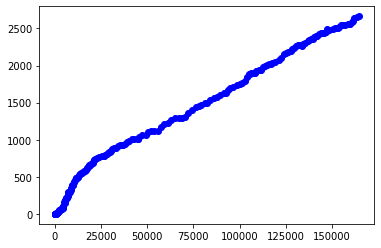

VA


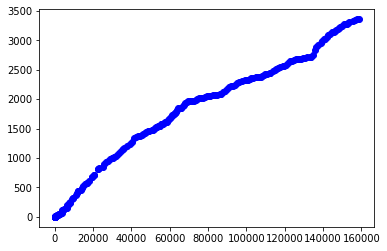

MI


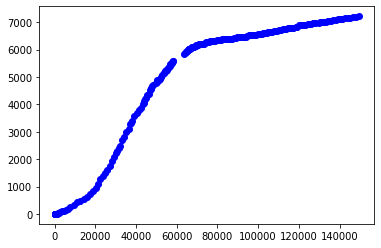

MS


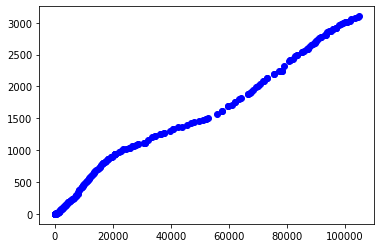

CA


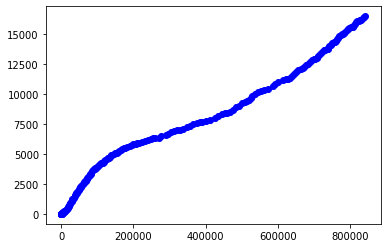

IL


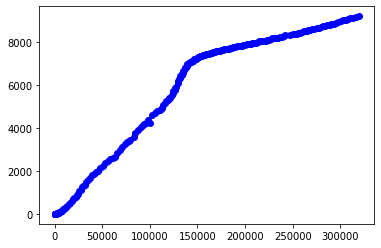

TX


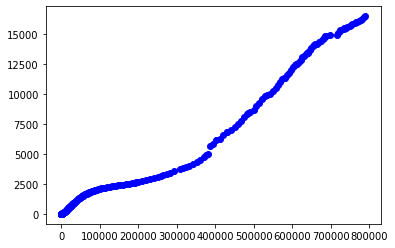

WI


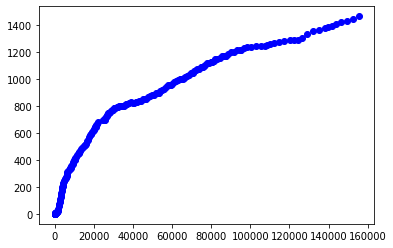

NJ


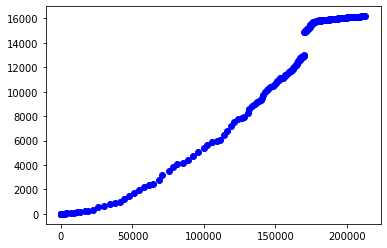

NV


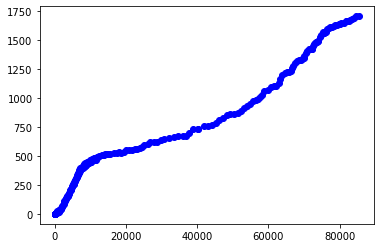

LA


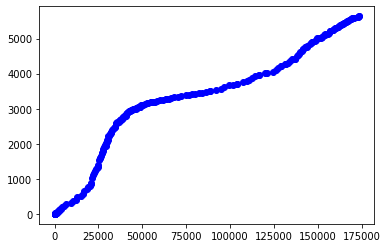

GA


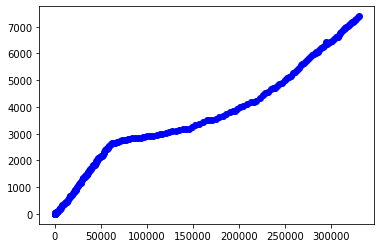

PR


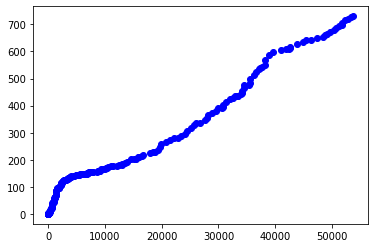

OK


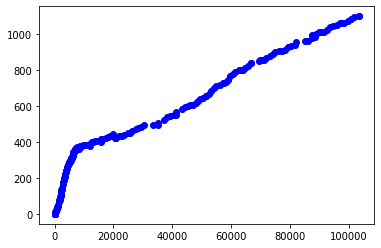

IN


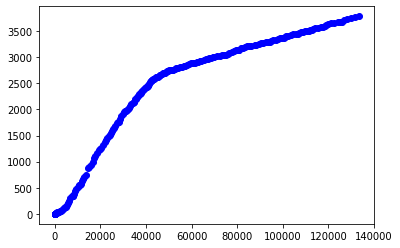

NC


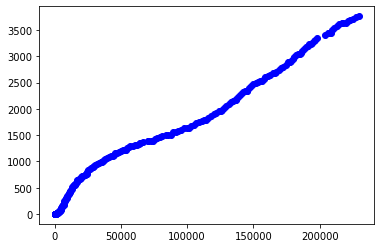

OR


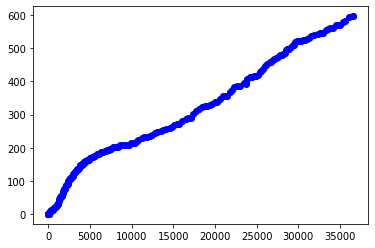

NY


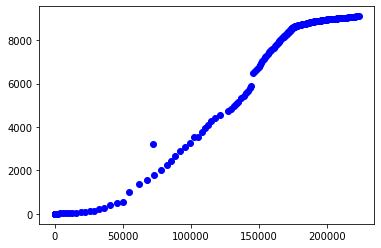

MD


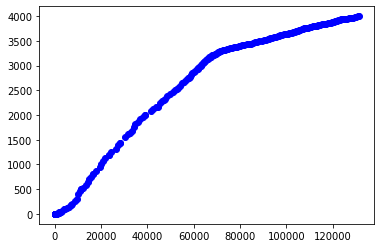

ID


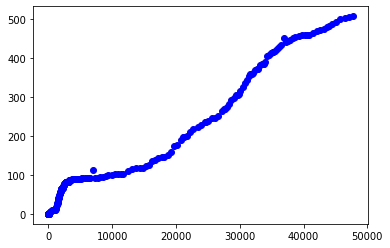

AR


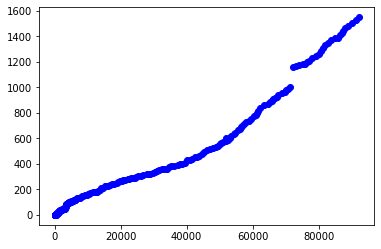

UT


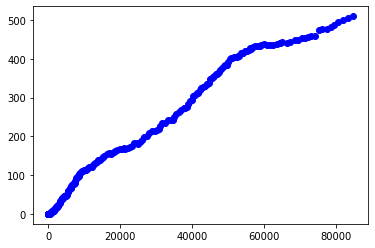

MO


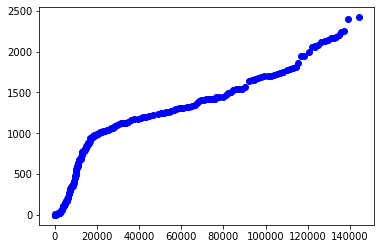

DE


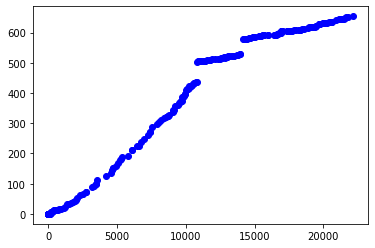

MN


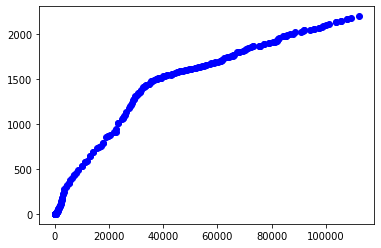

WV


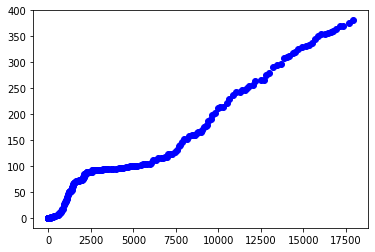

RI


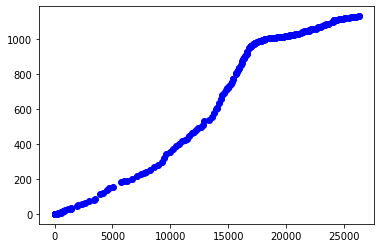

DC


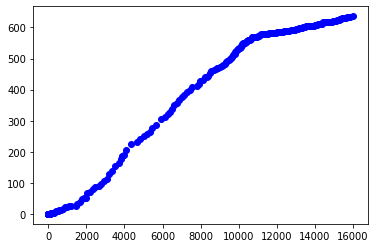

SD


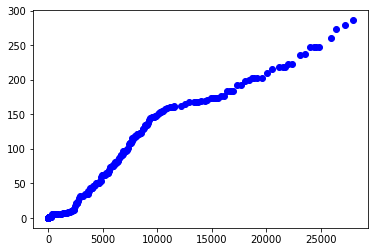

KS


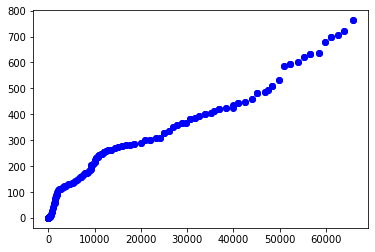

ME


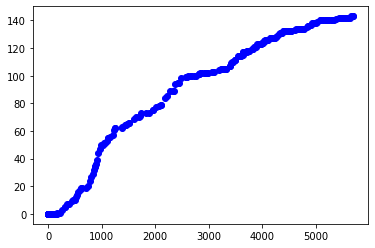

NH


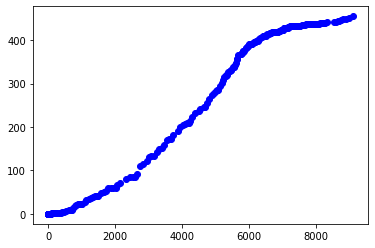

HI


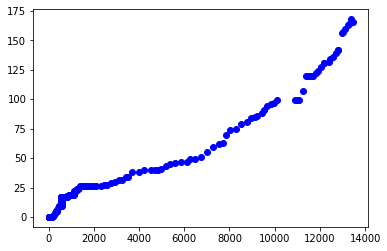

MT


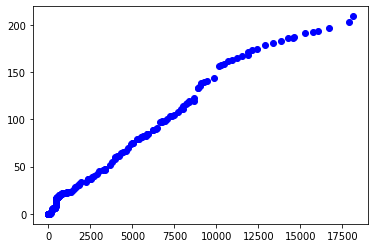

AK


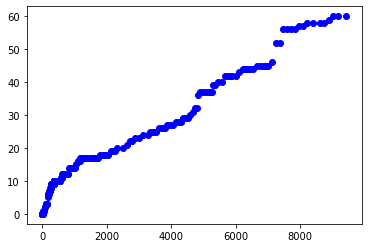

VT


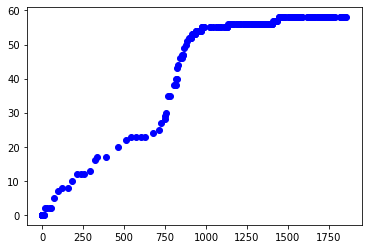

GU


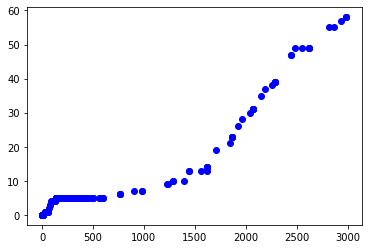

VI


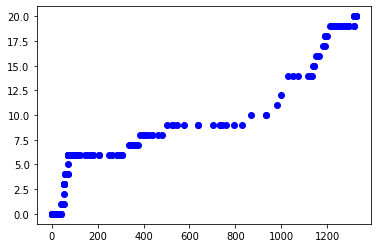

MP


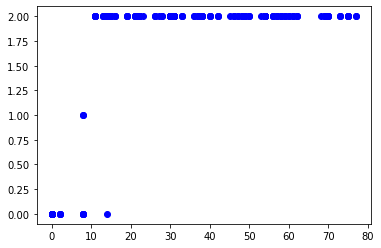

FSM


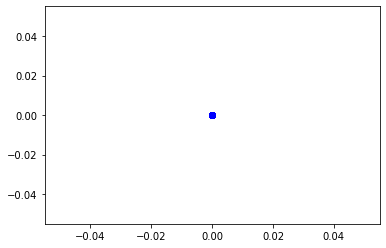

PW


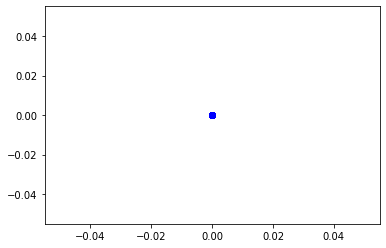

In [ ]:
states = corona['state'].unique()

for s in states:
    print(s)
    newdf = corona[corona['state'] == s]
    X = newdf[['tot_cases']]
    y = newdf[['tot_death']]
    
    plt.scatter(X, y, color ='b') 
    plt.show()

In [ ]:
corona["submission_date"] = pd.to_datetime(corona["submission_date"]).dt.strftime("%Y%m%d").astype(int)
corona["submission_date"]

0        20200122
1        20200123
2        20200124
3        20200125
4        20200126
           ...   
15775    20201006
15776    20201007
15777    20201008
15778    20201009
15779    20201010
Name: submission_date, Length: 15780, dtype: int64

In [ ]:
unique_dates = corona["submission_date"].unique()

unique_dates.shape

(263,)

In [ ]:
total_cases = []
total_deaths = []

for i in range (0,263):
    a = corona.loc[corona['submission_date'].isin([20200122+i])]
    total_cases.append(a['tot_cases'].sum())
    total_deaths.append(a['tot_death'].sum())

Text(0, 0.5, 'Deaths')

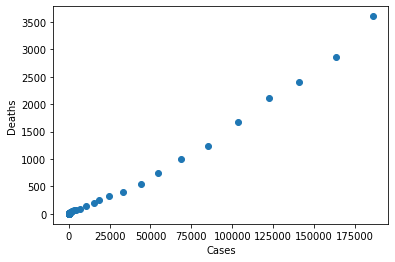

In [ ]:
plt.scatter(total_cases, total_deaths)
 
plt.xlabel('Cases') 
plt.ylabel('Deaths') 

In [ ]:
dataframe = pd.DataFrame({'Dates':corona['submission_date'].unique().tolist(), 'Cases':total_cases, 'Deaths':total_deaths})
dataframe

,Dates,Cases,Deaths
0,20200122,1,0
1,20200123,1,0
2,20200124,2,0
3,20200125,2,0
4,20200126,5,0
...,...,...,...
258,20201006,0,0
259,20201007,0,0
260,20201008,0,0
261,20201009,0,0


In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

X_train, X_test, y_train, y_test = train_test_split(dataframe[['Cases']], dataframe[['Deaths']], test_size = 0.25) 

regr = LinearRegression() 
  
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))

0.9404751661656321


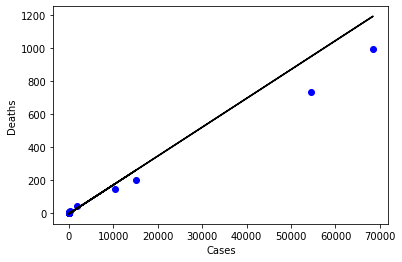

In [ ]:
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
plt.xlabel('Cases') 
plt.ylabel('Deaths') 
plt.show() 

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10,  shuffle=True) # k=10
scores = cross_val_score(regr, dataframe[['Cases']], dataframe[['Deaths']].values.ravel(), cv=cv)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.957 (0.039)


In [ ]:
states = corona['state'].unique()
states

array(['CO', 'FL', 'AZ', 'SC', 'CT', 'NE', 'KY', 'WY', 'IA', 'NM', 'ND',
       'WA', 'RMI', 'TN', 'AS', 'MA', 'PA', 'NYC', 'OH', 'AL', 'VA', 'MI',
       'MS', 'CA', 'IL', 'TX', 'WI', 'NJ', 'NV', 'LA', 'GA', 'PR', 'OK',
       'IN', 'NC', 'OR', 'NY', 'MD', 'ID', 'AR', 'UT', 'MO', 'DE', 'MN',
       'WV', 'RI', 'DC', 'SD', 'KS', 'ME', 'NH', 'HI', 'MT', 'AK', 'VT',
       'GU', 'VI', 'MP', 'FSM', 'PW'], dtype=object)

['CO' 'FL' 'AZ' 'SC' 'CT' 'NE' 'KY' 'WY' 'IA' 'NM' 'ND' 'WA' 'TN' 'MA'
 'PA' 'NYC' 'OH' 'AL' 'VA' 'MI' 'MS' 'CA' 'IL' 'TX' 'WI' 'NJ' 'NV' 'LA'
 'GA' 'PR' 'OK' 'IN' 'NC' 'OR' 'NY' 'MD' 'ID' 'AR' 'UT' 'MO' 'DE' 'MN'
 'WV' 'RI' 'DC' 'SD' 'KS' 'ME' 'NH' 'HI' 'MT' 'AK']
CO


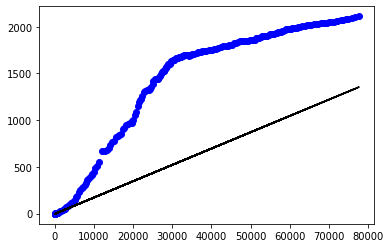

0.1326276823936774
FL


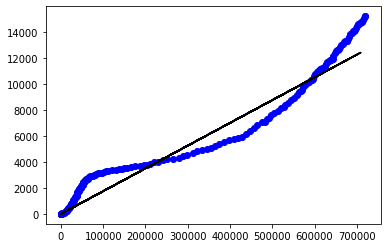

0.9572930830060719
AZ


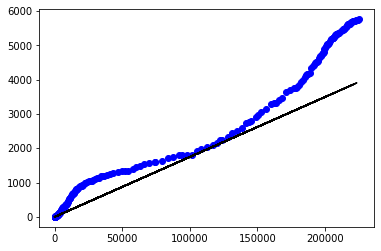

0.8370037398000907
SC


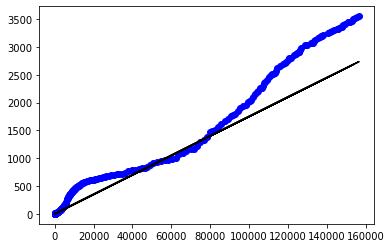

0.9105035927071325
CT


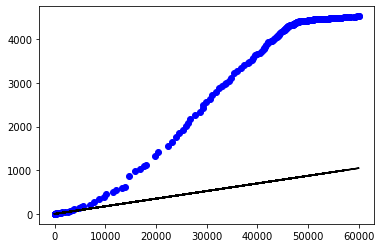

-0.8792507120133259
NE


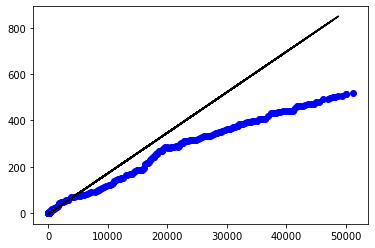

0.4245430540149542
KY


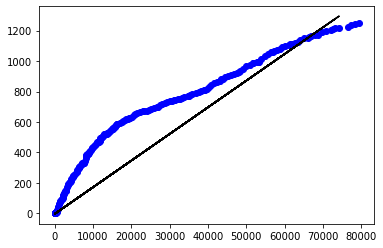

0.796060686073929
WY


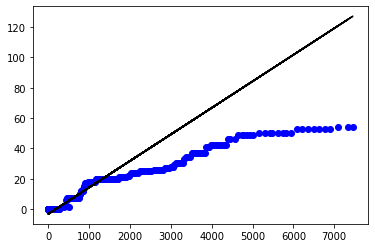

-0.3496044190600496
IA


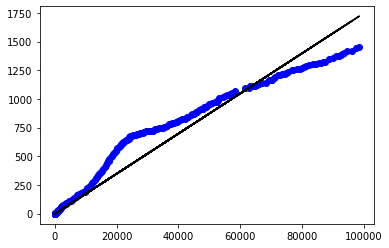

0.9547721845532018
NM


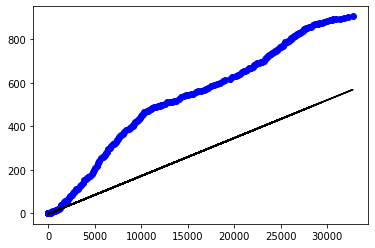

0.5234392227711143
ND


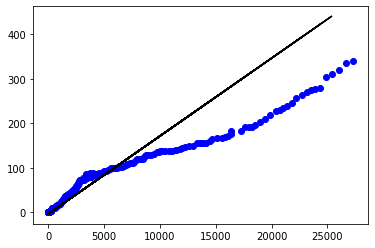

0.6168956989489387
WA


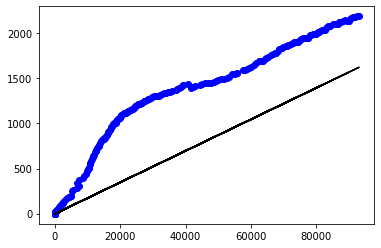

0.5027739568860992
TN


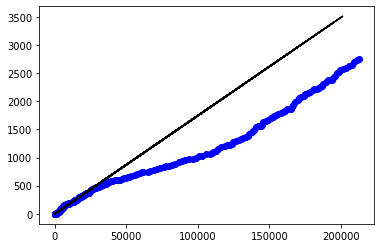

0.5041682117210289
MA


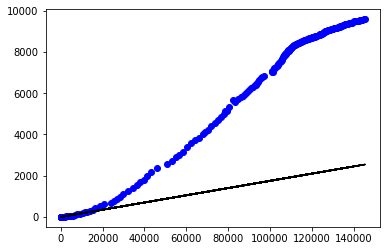

-1.1200588710960102
PA


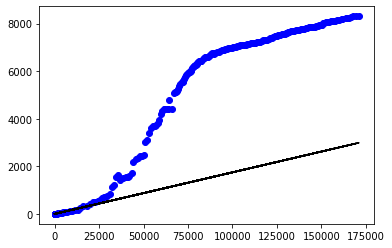

-0.26710005695866545
NYC


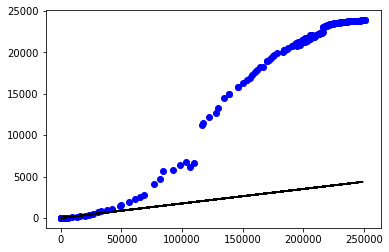

-1.434651945081603
OH


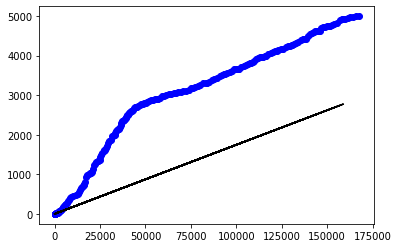

0.2217970131593625
AL


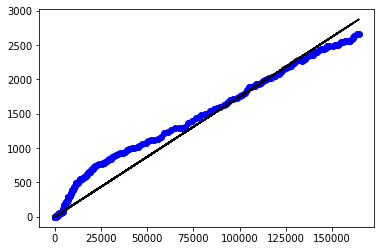

0.9593328511439799
VA


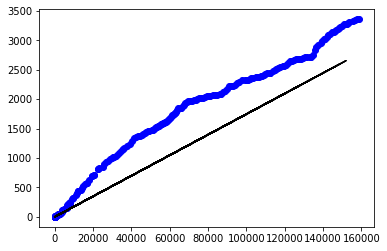

0.8278350432624777
MI


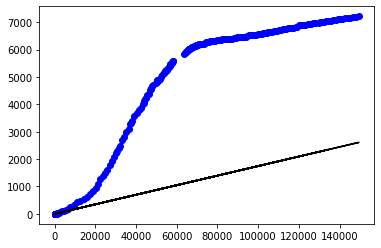

-0.8071031815929386
MS


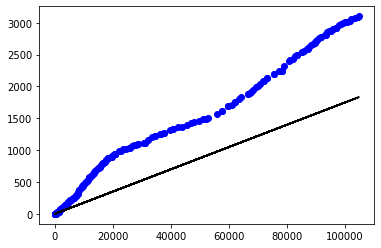

0.639602994738759
CA


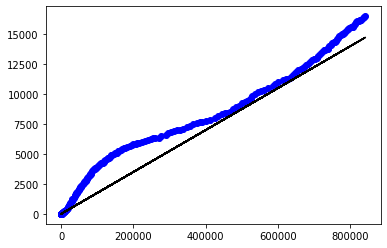

0.9387396363442322
IL


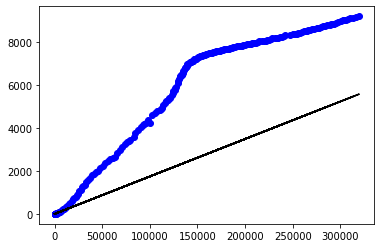

0.2564711648831669
TX


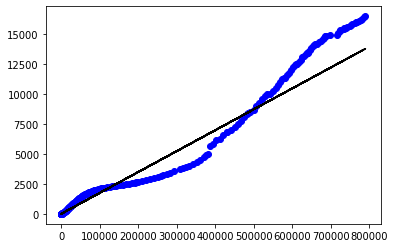

0.9558265321723216
WI


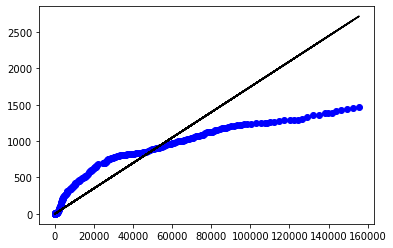

0.35236534662999097
NJ


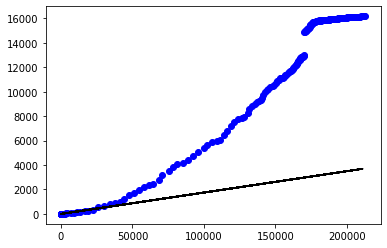

-0.5978758466037664
NV


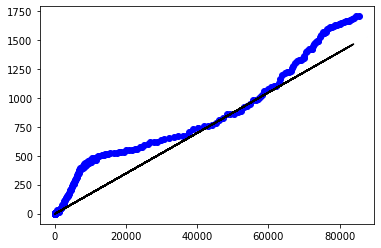

0.9302668988598916
LA


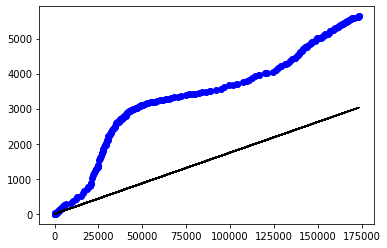

0.002759588036587046
GA


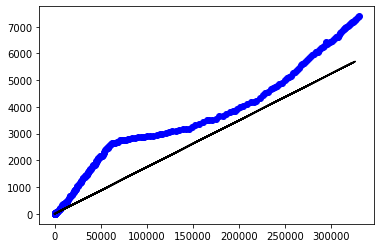

0.8733324071019015
PR


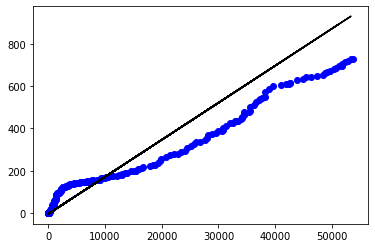

0.8506847538450977
OK


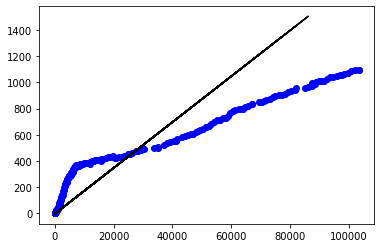

0.5154794609023678
IN


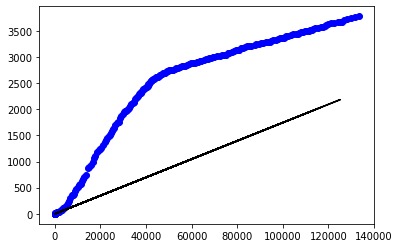

0.13759010127724947
NC


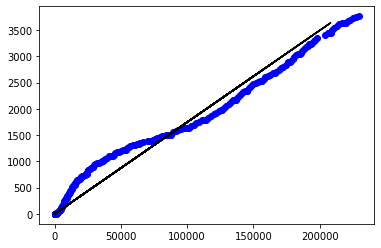

0.9694096997597634
OR


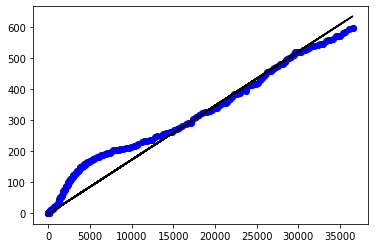

0.9700440654875703
NY


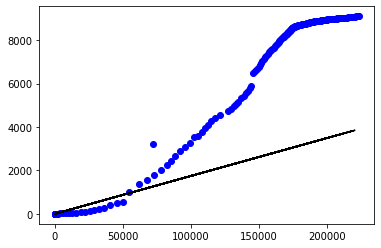

-0.1421350226842597
MD


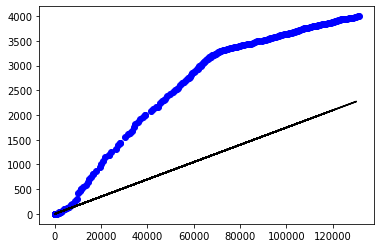

0.1487957400639084
ID


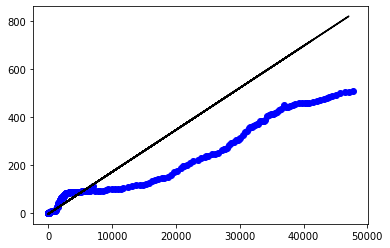

0.39213863831216206
AR


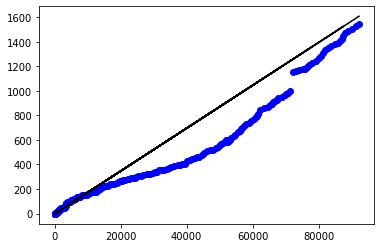

0.8954925369156213
UT


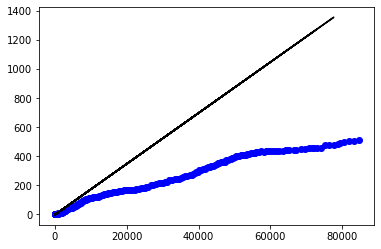

-2.6471256052984664
MO


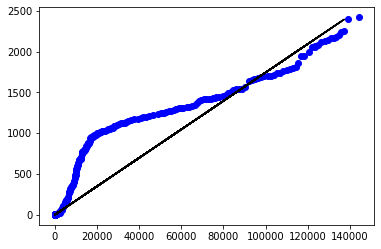

0.8034893788142492
DE


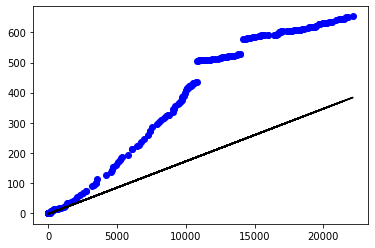

0.23606587437121307
MN


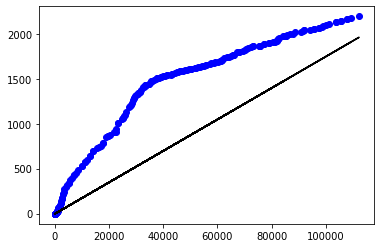

0.6361807842125822
WV


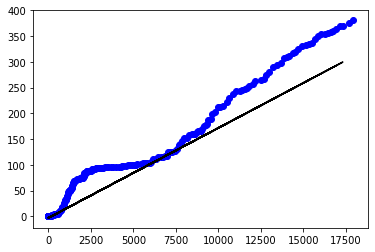

0.9120281349625501
RI


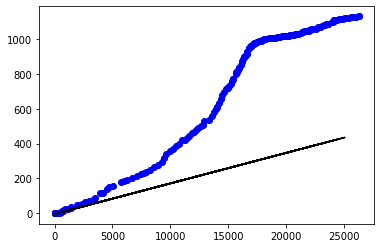

-0.0609515777664833
DC


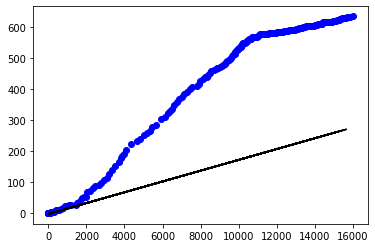

-0.12082600754878257
SD


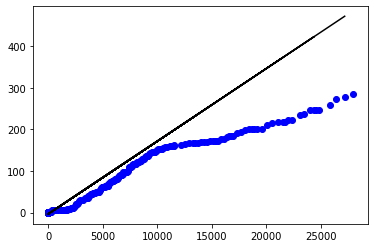

0.523764502939952
KS


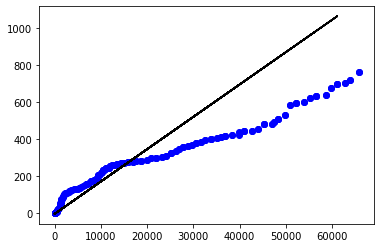

0.4795046891965559
ME


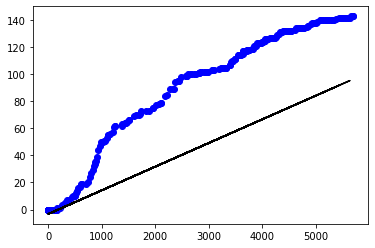

0.39739089395949495
NH


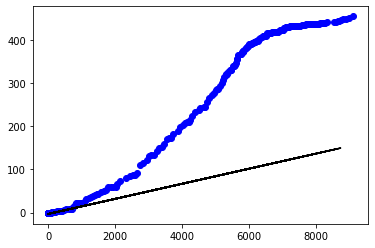

-0.4819099933542561
HI


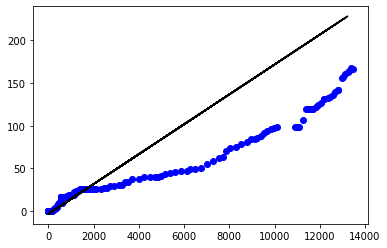

0.3534427918602119
MT


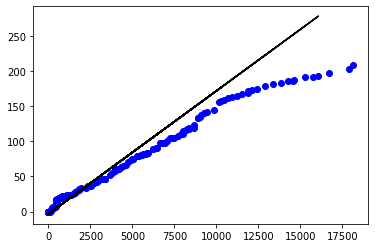

0.8777417186943798
AK


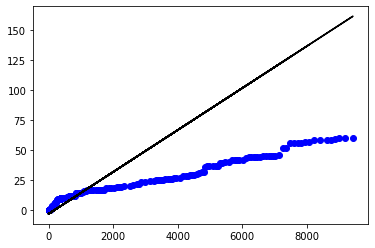

-2.168139230782877


In [ ]:
removestates = ['PW', 'FSM', 'MP', 'VI', 'GU', 'VT', 'RMI', 'AS']

for r in removestates:
    states = states[states != r]

print(states)

for s in states:
    print(s)
    newdf = corona[corona['state'] == s]
    X = newdf[['tot_cases']]
    y = newdf[['tot_death']]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
    
    regr_new = LinearRegression() 
  
    regr_new.fit(X_train, y_train)
    
    y_pred = regr.predict(X_test) 
    plt.scatter(X, y, color ='b') 
    plt.plot(X_test, y_pred, color ='k') 

    #print(y_pred)
  
    plt.show() 
    
    print(regr.score(X_test, y_test))


CO


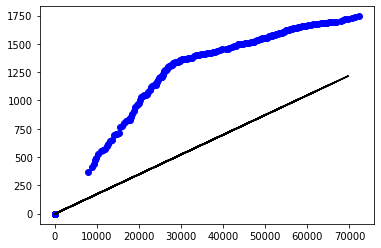

0.3069516528088941
FL


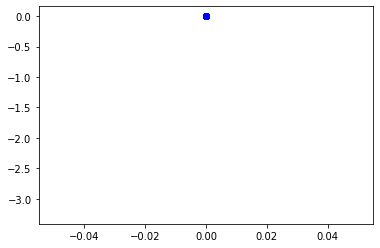

0.0
AZ


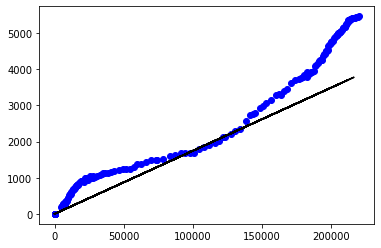

0.8699359349450437
SC


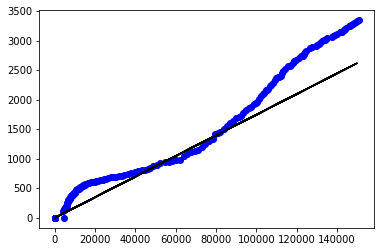

0.9197185548883192
CT


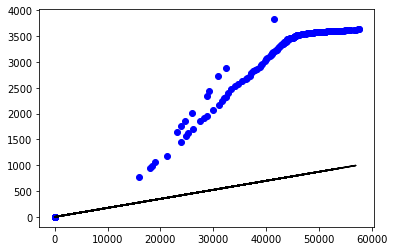

-0.33025681800487816
NE


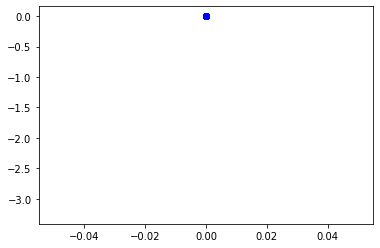

0.0
KY


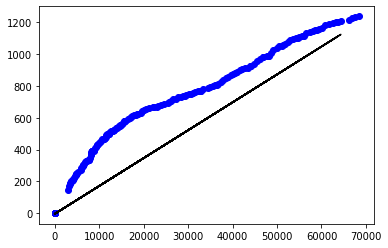

0.7593007809007077
WY


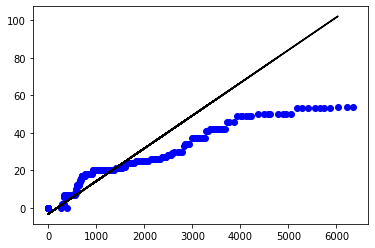

0.5705468317125315
IA


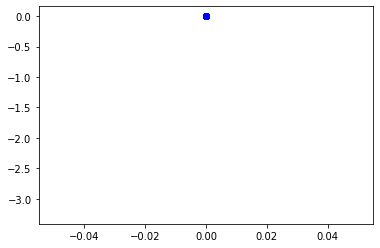

0.0
NM


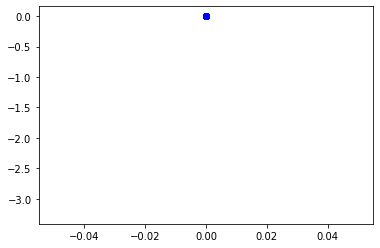

0.0
ND


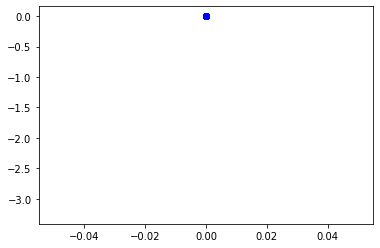

0.0
WA


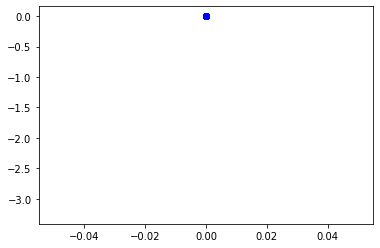

0.0
TN


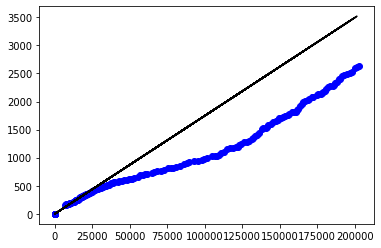

0.534130868071632
MA


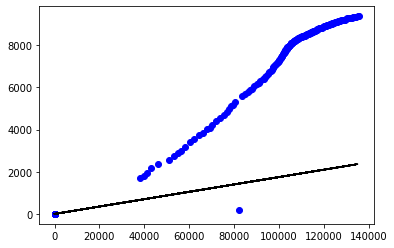

-0.562007361410741
PA


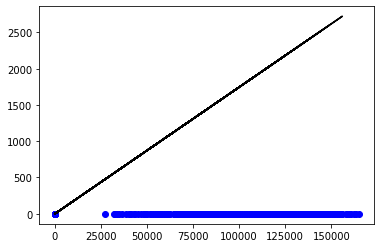

0.0
NYC


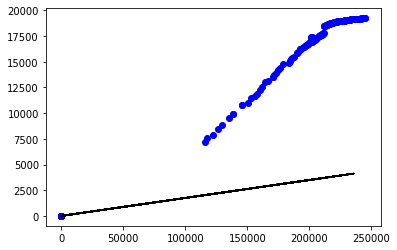

-0.4525511421465147
OH


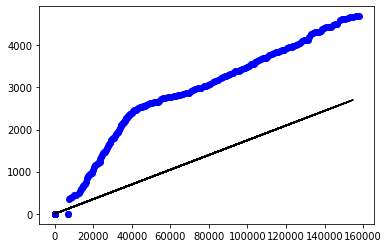

0.2828130135849324
AL


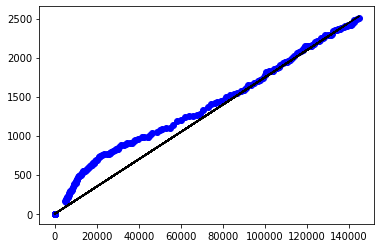

0.9733273956985633
VA


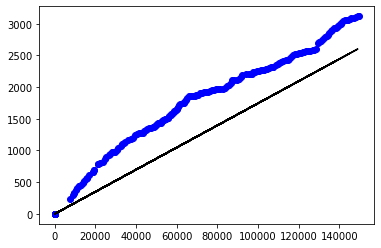

0.8370019595114344
MI


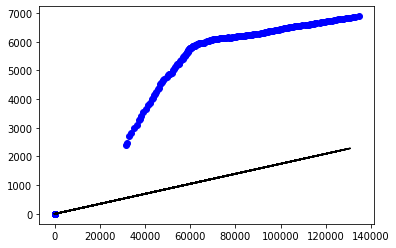

-0.8691157342944642
MS


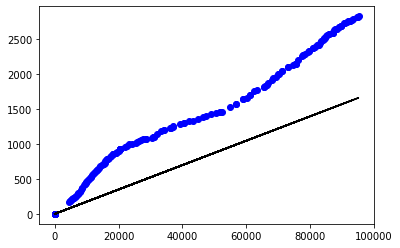

0.6019538650201983
CA


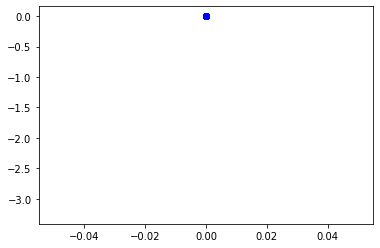

0.0
IL


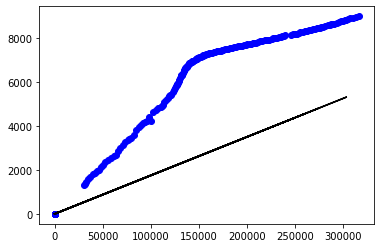

0.3765681003029857
TX


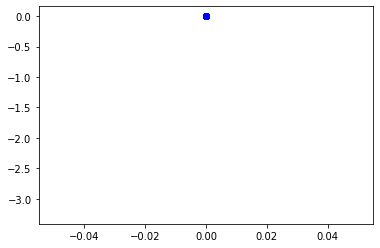

0.0
WI


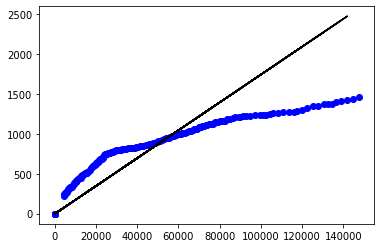

0.6241196757034282
NJ


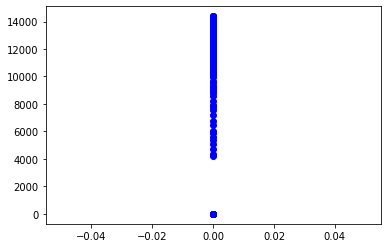

-2.3661817415576527
NV


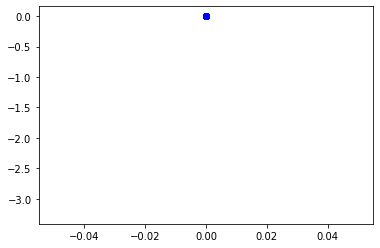

0.0
LA


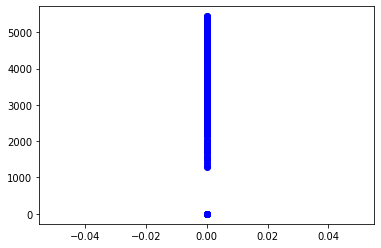

-1.7114770793744265
GA


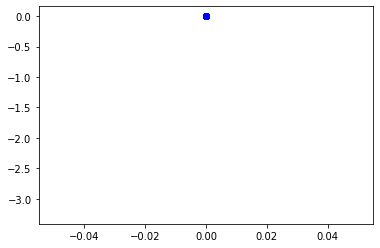

0.0
PR


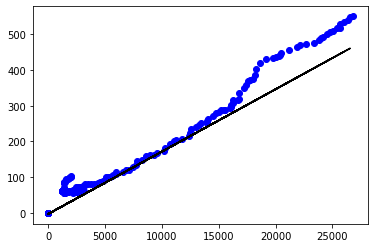

0.9411809440151447
OK


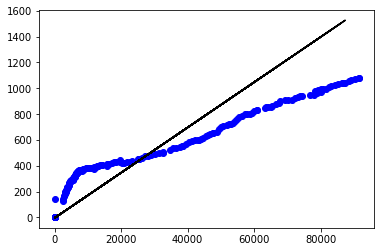

0.7170778732961077
IN


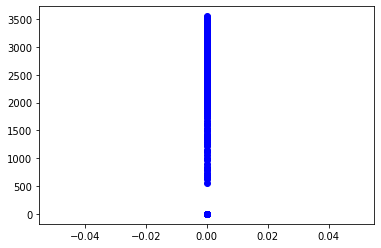

-2.520020928083372
NC


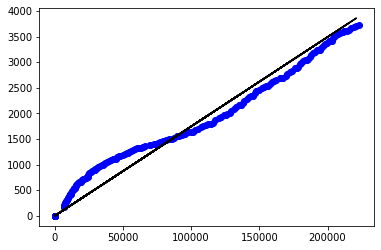

0.9726614764502493
OR


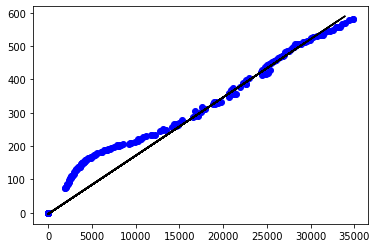

0.9379995020756435
NY


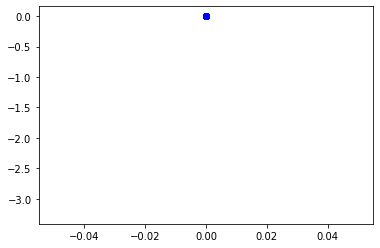

0.0
MD


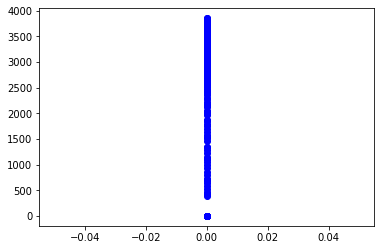

-1.9328618551383068
ID


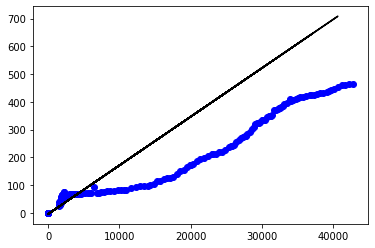

0.3059548903741325
AR


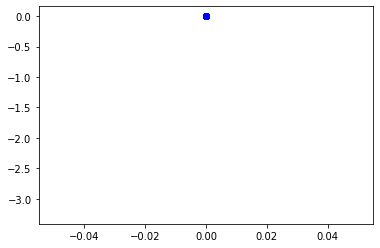

0.0
UT


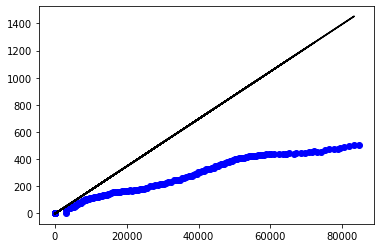

-2.6321807782416964
MO


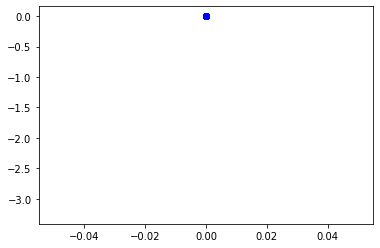

0.0
DE


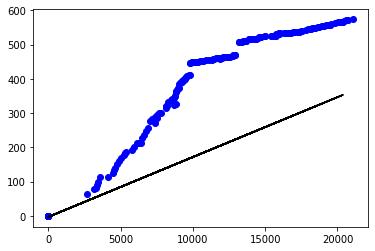

0.3237481371991865
MN


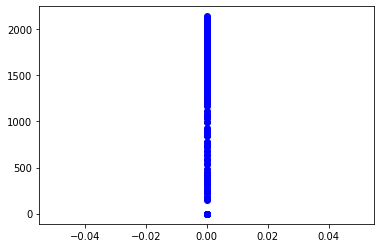

-1.3130140794468468
WV


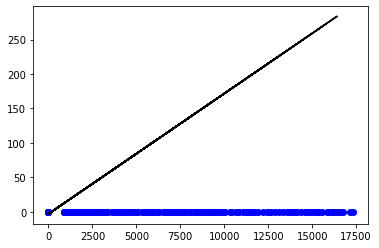

0.0
RI


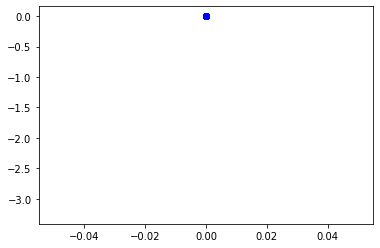

0.0
DC


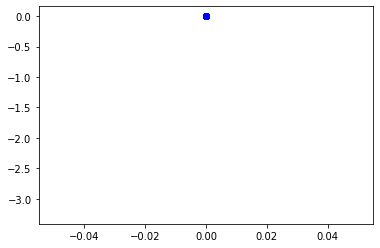

0.0
SD


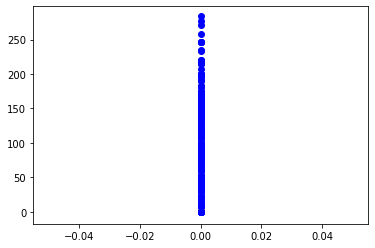

-0.9053021456932558
KS


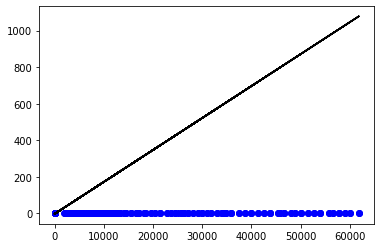

0.0
ME


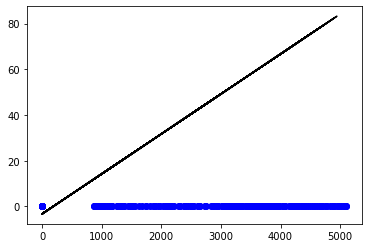

0.0
NH


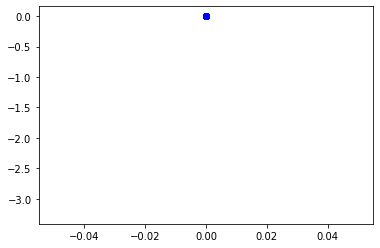

0.0
HI


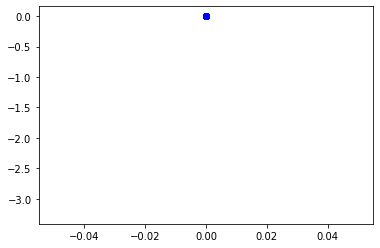

0.0
MT


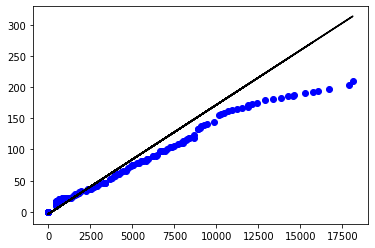

0.866120594366192
AK


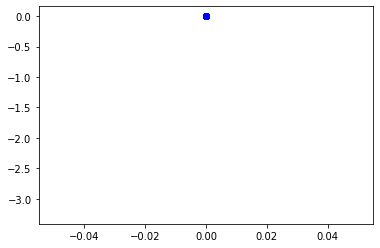

0.0


In [ ]:
for s in states:
    print(s)
    newdf = corona[corona['state'] == s]
    newdf = newdf.fillna(0)
    X = newdf[['conf_cases']]
    y = newdf[['conf_death']]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
    
    regr_new = LinearRegression() 
  
    regr_new.fit(X_train, y_train)
    
    y_pred = regr.predict(X_test) 
    plt.scatter(X, y, color ='b') 
    plt.plot(X_test, y_pred, color ='k') 

  
    plt.show() 
    
    print(regr.score(X_test, y_test))

CO
[[  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424277]
 [  50.02424687]
 [  50.02425917]
 [  50.02450516]
 [  50.02450516]
 [  50.0248331 ]
 [  50.02542738]
 [  50.02897924]
 [  50.03407673]
 [  50.03407673]
 [  50.03407673]
 [  50.10897388]
 [  50.12880776]
 [  50.16095326]
 [  50.21454904]
 [  50.33674302]
 [  50.5597

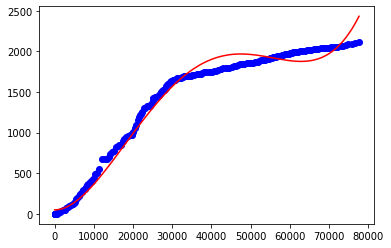

0.9894736491503704
FL
[[  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441936]
 [  849.10441947]
 [  849.10441979]
 [  849.10441979]
 [  849.10442034]
 [  849.10442034]
 [  849.10442329]
 [  849.10442329]
 [  849.10445884]
 [  849.10445884]
 [  849.1044933 ]
 [  849.10452447]
 [  849.10452447]
 [  849.10475021]
 [  849.1064419 ]
 [  84

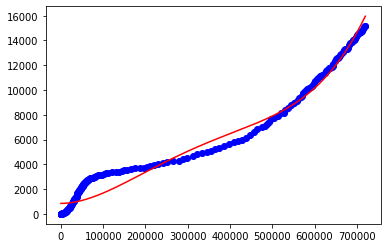

0.9724349500768144
AZ
[[ 242.48924636]
 [ 242.48924636]
 [ 242.48924636]
 [ 242.48924636]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924677]
 [ 242.48924801]
 [ 242.48924801]
 [ 242.48925008]
 [ 242.48925008]
 [ 242.48925671]
 [ 242.48925671]
 [ 242.48926126]
 [ 242.48927285]
 [ 242.48927988]
 [ 242.48927988]
 [ 242.48928775]
 [ 242.48930595]
 [ 242.4893163 ]
 [ 242.48938044]
 [ 242.48938044]
 [ 242.48954803]
 [ 242.49

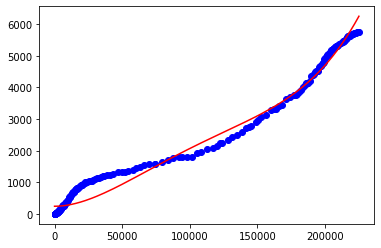

0.9839824367156246
SC
[[ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897769]
 [ 164.44897916]
 [ 164.44899094]
 [ 164.44899572]
 [ 164.4490075 ]
 [ 164.44901449]
 [ 164.44903068]
 [ 164.44903068]
 [ 164.44903068]
 [ 164.44926617]
 [ 164.44937839]
 [ 164.44979043]
 [ 164.4503021 ]
 [ 164.45

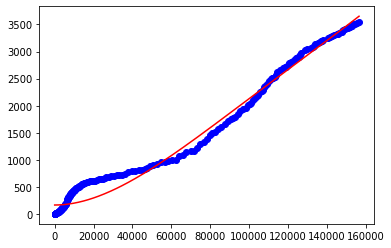

0.9810330656372659
CT
[[   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67566621]
 [   4.67637707]
 [   4.67637707]
 [   4.67709644]
 [   4.67782432]
 [   4.68082087]
 [   4.68082087]
 [   4.68082087]
 [   4.69691242]
 [   4.71178367]
 [   4.74336809]
 [   4.78265789]
 [   4.89

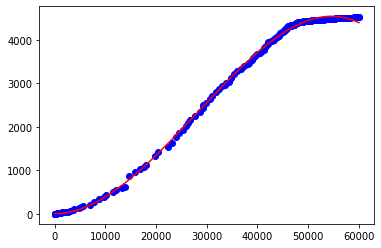

0.9995661224604889
NE
[[  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.97692682]
 [  1.98723834]
 [  1.99755066]
 [  1.99755066]
 [  2.01817767]
 [  2.01817767]
 [  2.02849237]
 [  2.08007776]
 [  2.08007776]
 [  2.08007776]
 [  2.16265562]
 [  2.16265562]
 [  2.19363539]
 [  2.25561631]
 [  2.25561631]
 [  2.36932197]
 [  2.4106932 ]
 [  2.49347357]
 [

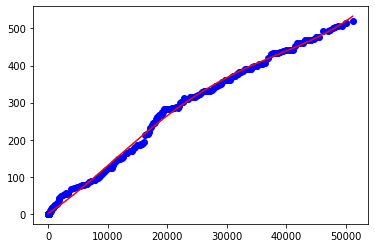

0.9972564913791655
KY
[[-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.63178084e+00]
 [-3.57205577e+00]
 [-3.57205577e+00]
 [-3.57205577e+00]
 [-3.39290429e+00]
 [-3.39290429e+00]
 [-2.97502272e+00]
 [-2.9750

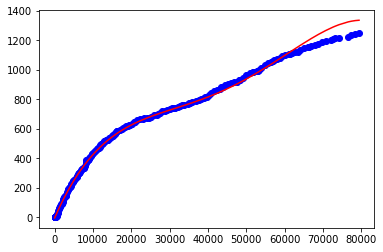

0.9972446424748794
WY
[[-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-8.03726821e-01]
 [-7.84617409e-01]
 [-7.8461

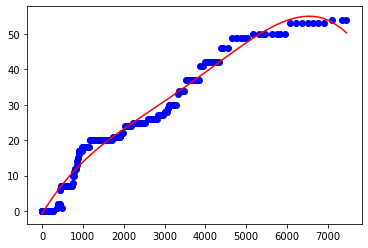

0.983156809317722
IA
[[  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26793588]
 [  57.26794765]
 [  57.26801957]
 [  57.26815687]
 [  57.26819217]
 [  57.26827061]
 [  57.26827061]
 [  57.26827061]
 [  57.26856865]
 [  57.26862747]
 [  57.26903524]
 [  57.26982317]
 [  57.270

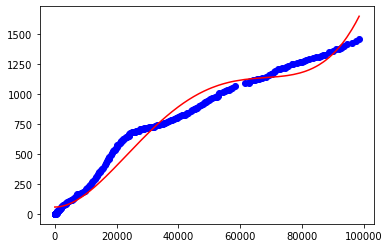

0.9719814797646685
NM
[[-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.65872404e+00]
 [-9.49898025e+00]
 [-9.39249554e+00]
 [-9.3924

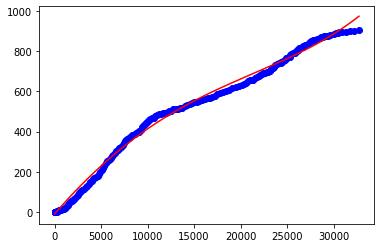

0.9959260027499384
ND
[[-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.15063704e+00]
 [-1.12092205e+00]
 [-1.1209

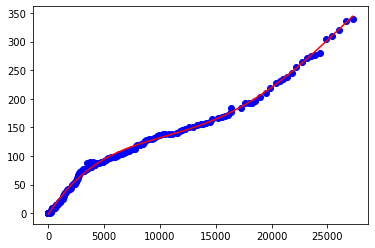

0.9979009188233735
WA
[[ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.6844369 ]
 [ 179.68455828]
 [ 179.68474034]
 [ 179.68525352]
 [ 179.68627711]
 [ 179.68827812]
 [ 179.6968091 ]
 [ 179.70019272]
 [ 179.71069132]
 [ 179.73107963]
 [ 179.75058277]
 [ 179.86371805]
 [ 180.02060822]
 [ 180.20754192]
 [ 180.49060283]
 [ 180.71271649]
 [ 180.93324244]
 [ 181.15578071]
 [ 181.82895479]
 [ 183.15875462]
 [ 184.33

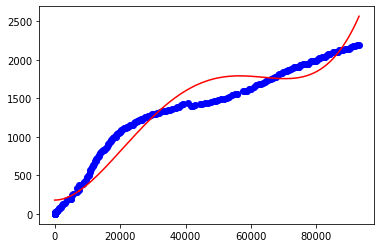

0.943067942299308
TN
[[ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975354]
 [ 114.51975379]
 [ 114.51975379]
 [ 114.51975379]
 [ 114.51975379]
 [ 114.51975379]
 [ 114.51976565]
 [ 114.51977356]
 [ 114.51983363]
 [ 114.51992062]
 [ 114.51992062]
 [ 114.52012944]
 [ 114.52042174]
 [ 114.5210702 ]
 [ 114.52212596]
 [ 114.525

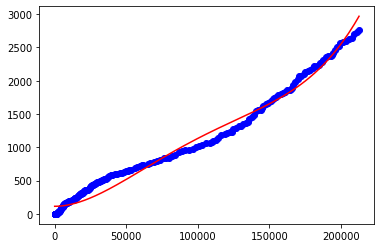

0.980549808442296
MA
[[  24.36420399]
 [  24.36420399]
 [  24.36420399]
 [  24.36420399]
 [  24.36420399]
 [  24.36420399]
 [  24.36420399]
 [  24.36420399]
 [  24.36420399]
 [  24.36420399]
 [  24.36420516]
 [  24.36420516]
 [  24.36420516]
 [  24.36420516]
 [  24.36420516]
 [  24.36420516]
 [  24.36420516]
 [  24.36420516]
 [  24.36420516]
 [  24.36420516]
 [  24.36420516]
 [  24.36420516]
 [  24.36420516]
 [  24.36420516]
 [  24.36420516]
 [  24.36420516]
 [  24.36420516]
 [  24.36420516]
 [  24.36420516]
 [  24.36420516]
 [  24.36420516]
 [  24.36420516]
 [  24.36420516]
 [  24.36420516]
 [  24.36420516]
 [  24.36420516]
 [  24.36420516]
 [  24.36420516]
 [  24.36420516]
 [  24.36420516]
 [  24.36420516]
 [  24.36420866]
 [  24.36420866]
 [  24.36420866]
 [  24.36426123]
 [  24.3642986 ]
 [  24.36511971]
 [  24.36511971]
 [  24.37387442]
 [  24.37474312]
 [  24.37782433]
 [  24.37807768]
 [  24.37807768]
 [  24.39560578]
 [  24.40951   ]
 [  24.41968044]
 [  24.44069768]
 [  24.489

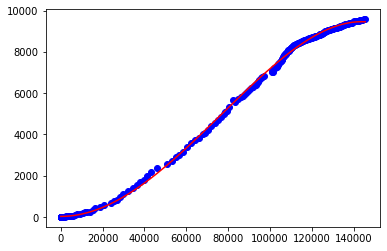

0.99940242233584
PA
[[-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.39006796]
 [-123.3900586 ]
 [-123.3900305 ]
 [-123.38998367]
 [-123.38983383]
 [-123.38973082]
 [-123.38946862]
 [-123.38882956]
 [-123.38809928]
 [-123.38489784]
 [-123.38078002]
 [-123.37655309]
 [-123.36850818]
 [-123.34870116]
 [-123.3100

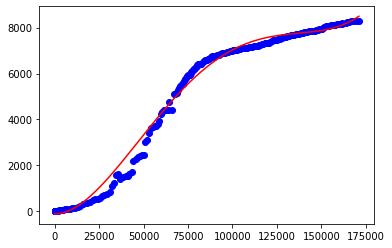

0.9934717475291913
NYC
[[ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721221]
 [ -114.44721122]
 [ -114.44721122]
 [ -114.44721122]
 [ -114.44720823]
 [ -114.44720823]
 [ -114.44720823]
 [ -114.4470687 ]
 [ -114.44692419]
 [ -114.44592061]
 [ -114.44441281]
 [ -114.43821859]
 [ -114.43821859]
 [ -114.4247922 ]
 [ -114.37512064]
 [ -1

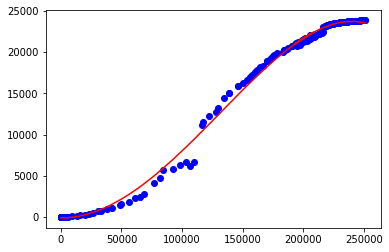

0.9979022867480362
OH
[[ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42548301]
 [ 238.42549933]
 [ 238.42549933]
 [ 238.42552833]
 [ 238.42552833]
 [ 238.42552833]
 [ 238.42796377]
 [ 238.43001255]
 [ 238.43361462]
 [ 238.43950742]
 [ 238.45

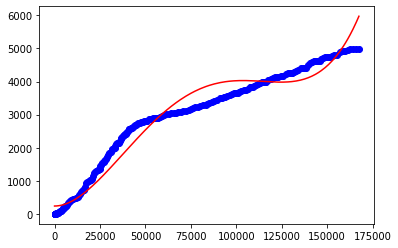

0.964453124175756
AL
[[ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614575]
 [ 162.35614641]
 [ 162.35614641]
 [ 162.35646148]
 [ 162.35669431]
 [ 162.35713775]
 [ 162.3578419 ]
 [ 162.360

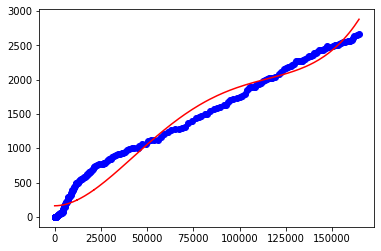

0.9650247606902238
VA
[[ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017329]
 [ 108.23017739]
 [ 108.23019894]
 [ 108.23023895]
 [ 108.2304041 ]
 [ 108.23103588]
 [ 108.23103588]
 [ 108.23103588]
 [ 108.23284036]
 [ 108.23477544]
 [ 108.23491379]
 [ 108.23922914]
 [ 108.24

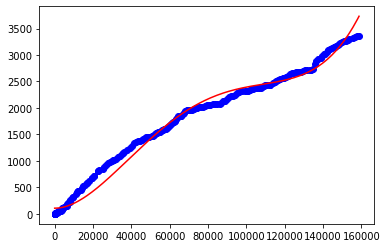

0.9869917075919703
MI
[[  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18981399]
 [  39.18982888]
 [  39.18982888]
 [  39.1898475 ]
 [  39.19044318]
 [  39.19214052]
 [  39.20026669]
 [  39.20066472]
 [  39.20553347]
 [  39.21362127]
 [  39.60

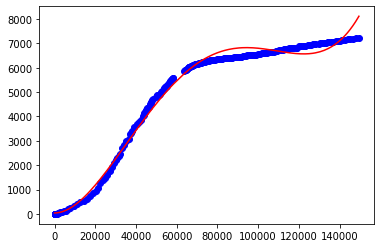

0.9946969184679991
MS
[[ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395115]
 [ 143.67395289]
 [ 143.67395289]
 [ 143.67401368]
 [ 143.67412483]
 [ 143.67420124]
 [ 143.67595805]
 [ 143.67829013]
 [ 143.68

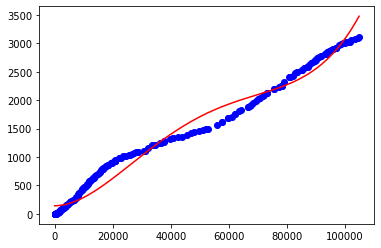

0.9735647528873917
CA
[[  991.36667057]
 [  991.36667057]
 [  991.36667057]
 [  991.36667057]
 [  991.36667117]
 [  991.36667117]
 [  991.36667117]
 [  991.36667117]
 [  991.36667117]
 [  991.36667191]
 [  991.36667191]
 [  991.36667191]
 [  991.36667593]
 [  991.36667593]
 [  991.36667593]
 [  991.36667593]
 [  991.36667593]
 [  991.36667593]
 [  991.36667593]
 [  991.36667593]
 [  991.36667786]
 [  991.36667786]
 [  991.3666801 ]
 [  991.3666801 ]
 [  991.3666801 ]
 [  991.3666801 ]
 [  991.3666801 ]
 [  991.3666801 ]
 [  991.3666801 ]
 [  991.3666801 ]
 [  991.36668546]
 [  991.36668546]
 [  991.36668546]
 [  991.36668546]
 [  991.36668546]
 [  991.36668546]
 [  991.36668858]
 [  991.36668858]
 [  991.366692  ]
 [  991.366692  ]
 [  991.3667362 ]
 [  991.36679573]
 [  991.36686345]
 [  991.36697193]
 [  991.36713726]
 [  991.36713726]
 [  991.36847102]
 [  991.36938226]
 [  991.37010807]
 [  991.37122684]
 [  991.37413473]
 [  991.37703759]
 [  991.38105593]
 [  991.38691921]
 [  99

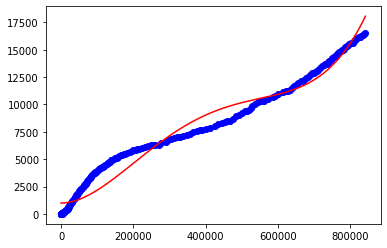

0.9650590982259711
IL
[[ 142.44965851]
 [ 142.44965851]
 [ 142.44965936]
 [ 142.44965936]
 [ 142.44965936]
 [ 142.44965936]
 [ 142.44965936]
 [ 142.44965936]
 [ 142.44965936]
 [ 142.4496619 ]
 [ 142.4496619 ]
 [ 142.4496619 ]
 [ 142.4496619 ]
 [ 142.4496619 ]
 [ 142.4496619 ]
 [ 142.4496619 ]
 [ 142.4496619 ]
 [ 142.4496619 ]
 [ 142.4496619 ]
 [ 142.4496619 ]
 [ 142.4496619 ]
 [ 142.4496619 ]
 [ 142.4496619 ]
 [ 142.4496619 ]
 [ 142.4496619 ]
 [ 142.4496619 ]
 [ 142.4496619 ]
 [ 142.4496619 ]
 [ 142.4496619 ]
 [ 142.4496619 ]
 [ 142.4496619 ]
 [ 142.4496619 ]
 [ 142.4496619 ]
 [ 142.4496619 ]
 [ 142.4496619 ]
 [ 142.4496619 ]
 [ 142.4496619 ]
 [ 142.4496619 ]
 [ 142.4496619 ]
 [ 142.44966613]
 [ 142.44967207]
 [ 142.44967207]
 [ 142.44967207]
 [ 142.44967969]
 [ 142.44968901]
 [ 142.44968901]
 [ 142.44970003]
 [ 142.44976103]
 [ 142.44996437]
 [ 142.45027614]
 [ 142.45052605]
 [ 142.45052605]
 [ 142.45052605]
 [ 142.4569835 ]
 [ 142.45899515]
 [ 142.47133151]
 [ 142.51982907]
 [ 142.60

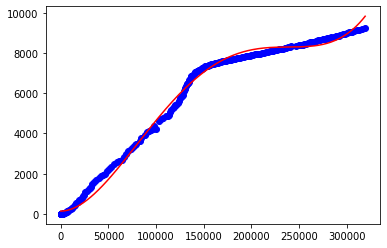

0.9957071423382471
TX
[[  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637114]
 [  579.19637149]
 [  579.19637212]
 [  579.19637212]
 [  579.19637255]
 [  579.19637775]
 [  579.19637995]
 [  579.19639185]
 [  579.19639369]
 [  579.19642189]
 [  579.19644354]
 [  579.19647299]
 [  57

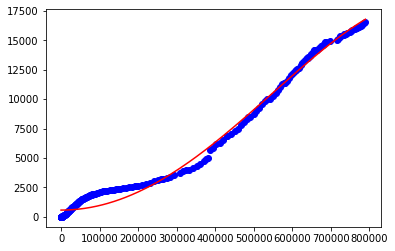

0.9888793441863064
WI
[[ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.080183  ]
 [ 168.08018367]
 [ 168.08018367]
 [ 168.08018367]
 [ 168.08018367]
 [ 168.08018367]
 [ 168.08018367]
 [ 168.08018367]
 [ 168.08018897]
 [ 168.08019957]
 [ 168.08022542]
 [ 168.08023669]
 [ 168.08042224]
 [ 168.08066607]
 [ 168.08204371]
 [ 168.08531032]
 [ 168.0876206 ]
 [ 168.09

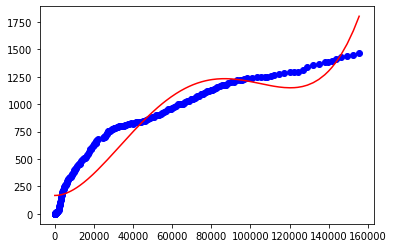

0.8920542033710999
NJ
[[  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830566]
 [  119.28830602]
 [  119.28830712]
 [  119.28830895]
 [  119.28830895]
 [  119.28831152]
 [  119.28832626]
 [  119.28835412]
 [  119.28838274]
 [  119.28838815]
 [  119.28848328]
 [  119.28919001]
 [  11

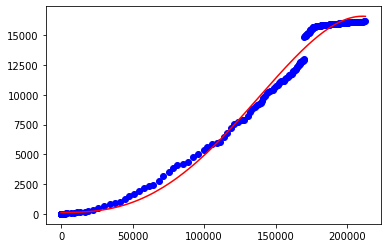

0.9924029549289366
NV
[[ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891319]
 [ 139.26891437]
 [ 139.26891437]
 [ 139.2689179 ]
 [ 139.26892378]
 [ 139.26893202]
 [ 139.26894262]
 [ 139.26897087]
 [ 139.2690556 ]
 [ 139.2690556 ]
 [ 139.2690556 ]
 [ 139.26921445]
 [ 139.27129473]
 [ 139.27247004]
 [ 139.27357921]
 [ 139.27

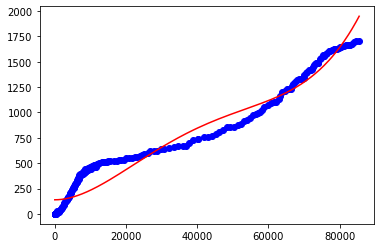

0.9448561906283698
LA
[[ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364787]
 [ 315.09364983]
 [ 315.09364983]
 [ 315.09377284]
 [ 315.09403056]
 [ 315.09577365]
 [ 315.09577365]
 [ 315.11354495]
 [ 315.13024155]
 [ 315.16398824]
 [ 315.22627125]
 [ 315.39

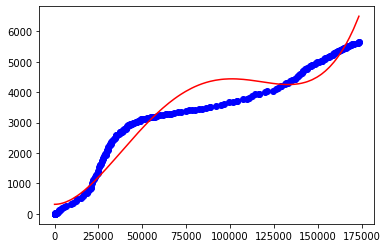

0.9507304192301277
GA
[[ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.8761971 ]
 [ 497.87619891]
 [ 497.87619891]
 [ 497.87619891]
 [ 497.87620117]
 [ 497.87621341]
 [ 497.8762193 ]
 [ 497.87634387]
 [ 497.87643672]
 [ 497.87663239]
 [ 497.87711426]
 [ 497.87711426]
 [ 497.87711426]
 [ 497.88260803]
 [ 497.88545339]
 [ 497.89053595]
 [ 497.90724695]
 [ 497.94

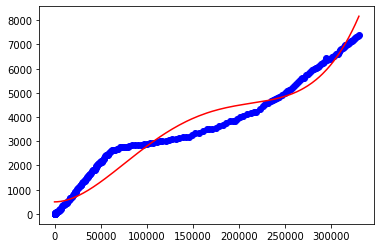

0.9518432233497957
PR
[[ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.47064558]
 [ 13.53774917]
 [ 13.53774917]
 [ 13.53774917]
 [ 13.53774917]
 [ 13.53774917]
 [ 13.94000347]
 [ 14.17436133]
 [ 14.24128142]
 [

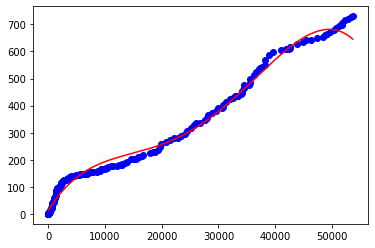

0.9907340267328608
OK
[[ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461219]
 [ 141.10461285]
 [ 141.10461285]
 [ 141.10461285]
 [ 141.10461482]
 [ 141.10461482]
 [ 141.10461811]
 [ 141.10462864]
 [ 141.10462864]
 [ 141.10466547]
 [ 141.10467797]
 [ 141.10484962]
 [ 141.10524411]
 [ 141.10

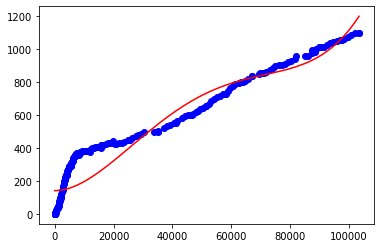

0.8801666507458319
IN
[[ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.42907824]
 [ 167.4290808 ]
 [ 167.4290808 ]
 [ 167.42908849]
 [ 167.4291013 ]
 [ 167.42914228]
 [ 167.42928571]
 [ 167.42944706]
 [ 167.42944706]
 [ 167.42944706]
 [ 167.43000275]
 [ 167.43055324]
 [ 167.43138272]
 [ 167.43297229]
 [ 167.43

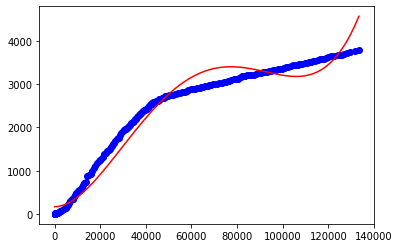

0.9727308329274819
NC
[[ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857271]
 [ 204.23857311]
 [ 204.23857311]
 [ 204.23857311]
 [ 204.23857431]
 [ 204.23857431]
 [ 204.23857431]
 [ 204.23859225]
 [ 204.23859225]
 [ 204.23859822]
 [ 204.23866239]
 [ 204.23866239]
 [ 204.2386879 ]
 [ 204.2390067 ]
 [ 204.23921031]
 [ 204.24010428]
 [ 204.24232054]
 [ 204.24

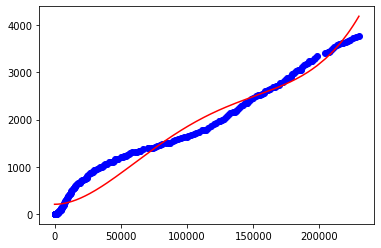

0.964718624439167
OR
[[-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.21884071e+00]
 [-1.17056712e+00]
 [-1.17056712e+00]
 [-1.07404331e+00]
 [-1.07404331e+00]
 [-1.07404331e+00]
 [-1.07404331e+00]
 [-1.07404331e+00]
 [-8.81089145e-01]
 [-5.43719036e-01]
 [-5.43719036e-01]
 [-4.95554426e-01]
 [-3.02973751e-01]
 [-6.24228034e-02]
 [-6.24228

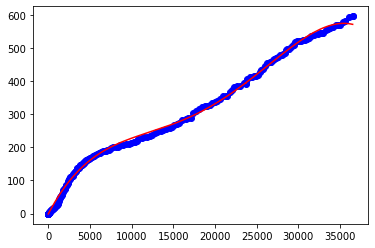

0.998392257891531
NY
[[6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335119e+00]
 [6.83335140e+00]
 [6.83338095e+00]
 [6.83344235e+00]
 [6.83351326e+00]
 [6.83351326e+00]
 [6.83658465e+00]
 [6.83723579e+00]
 [6.83891946e+00]
 [6.84431095e+00]
 [6.84812672e+00]
 [6.85340743e+00]
 [6.86656120e+00]
 [6.882

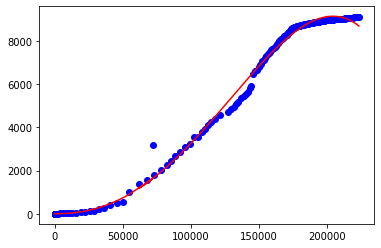

0.997501395277327
MD
[[  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44131462]
 [  81.44133322]
 [  81.44133322]
 [  81.44133322]
 [  81.44133322]
 [  81.44148197]
 [  81.44148197]
 [  81.44161212]
 [  81.44161212]
 [  81.44161212]
 [  81.44161212]
 [  81.44414192]
 [  81.44802276]
 [  81.45622638]
 [  81.46493745]
 [  81.487

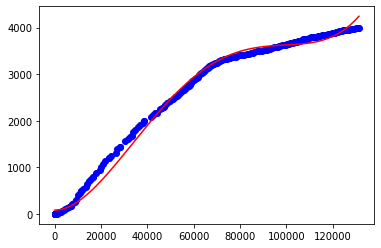

0.9951113288869857
ID
[[  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.01958013]
 [  4.04577529]
 [  4.15051248]
 [  4.15051248]
 [  4.15051248]
 [  4.28133626]
 [  4.62097034]
 [  4.82961177]
 [  5.11604127]
 [  5.24606345]
 [

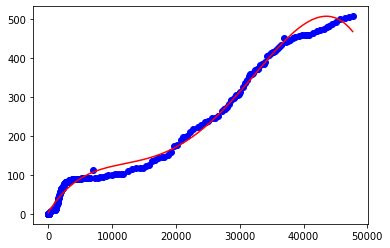

0.9927483299027289
AR
[[  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329065]
 [  45.92329111]
 [  45.92330728]
 [  45.92332807]
 [  45.92335717]
 [  45.9234089 ]
 [  45.92342414]
 [  45.92355668]
 [  45.92392281]
 [  45.92

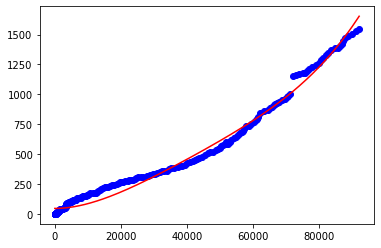

0.9862721497060998
UT
[[-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.38784665e+00]
 [-4.37750437e+00]
 [-4.37750437e+00]
 [-4.36716248e+00]
 [-4.35682099e+00]
 [-4.34647988e+00]
 [-4.3257

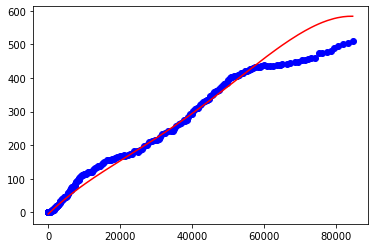

0.9758933324255344
MO
[[ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.45635973]
 [ 249.4563608 ]
 [ 249.4563608 ]
 [ 249.4563608 ]
 [ 249.4563608 ]
 [ 249.4563608 ]
 [ 249.4563608 ]
 [ 249.45636402]
 [ 249.45636402]
 [ 249.4563865 ]
 [ 249.45642825]
 [ 249.45654065]
 [ 249.45697625]
 [ 249.45

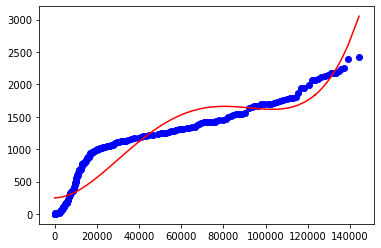

0.8665943818092013
DE
[[  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.1667116 ]
 [  2.16956633]
 [  2.17822956]
 [  2.1811503 ]
 [  2.19001147]
 [  2.19001147]
 [  2.19001147]
 [  2.21436631]
 [  2.24629082]
 [  2.2595207 ]
 [  2.29024766]
 [  2.31146963]
 [  2.35190591]
 [

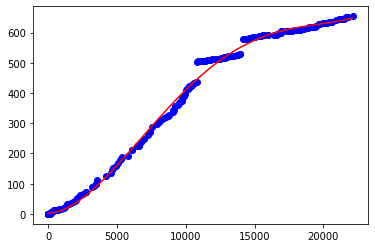

0.9974444154102522
MN
[[ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468708]
 [ 117.69468909]
 [ 117.69468909]
 [ 117.69469513]
 [ 117.69469513]
 [ 117.69471929]
 [ 117.69473741]
 [ 117.69488841]
 [ 117.69508166]
 [ 117.69508166]
 [ 117.7005533 ]
 [ 117.70192855]
 [ 117.70660978]
 [ 117.71061211]
 [ 117.72

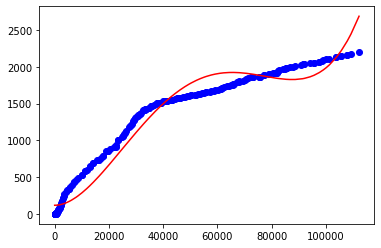

0.9651886904780116
WV
[[-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.12874412e+00]
 [-2.1287

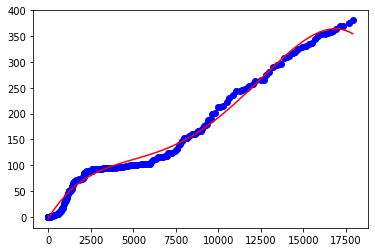

0.9928771426972125
RI
[[   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.43599446]
 [   5.4274002 ]
 [   5.41881835]
 [   5.41881835]
 [   5.41881835]
 [   5.41881835]
 [   5.41881835]
 [   5.41024891]
 [   5.41024891]
 [   5.41024891]
 [   5.39314723]
 [   5.39314723]
 [   5.39314723]
 [   5.39314723]
 [   5.3590927 ]
 [   5.25811927]
 [   5.24146386]
 [   5.24146386]
 [   5.15892995]
 [   5.06

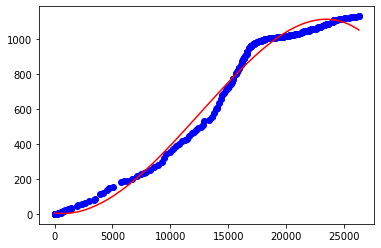

0.9922727166876368
DC
[[2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.64362041e-01]
 [2.71143511e-01]
 [2.71143511e-01]
 [2.77952775e-01]
 [2.77952775e-01]
 [2.77952775e-01]
 [2.77952775e-01]
 [2.84789827e-01]
 [2.84789827e-01]
 [3.83421987e-01]
 [4.19

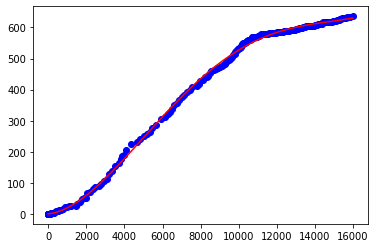

0.9993535684319746
SD
[[-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-9.26122432e-01]
 [-8.96411193e-01]
 [-8.78535126e-01]
 [-8.78535126e-01]
 [-8.7256

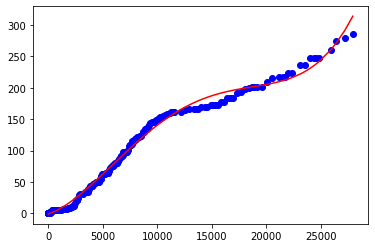

0.9935524966066684
KS
[[ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.89295055]
 [ 14.922566  ]
 [ 14.922566  ]
 [ 14.922566  ]
 [ 14.922566  ]
 [ 15.0113984 ]
 [ 15.07060837]
 [ 15.10020987]
 [ 15.12980903]
 [ 15.21859258]
 [ 15.36651864]
 [ 15.51438657]
 [ 15.92810768]
 [ 16.19383083]
 [ 16.51834824]
 [ 16.78365368]
 [

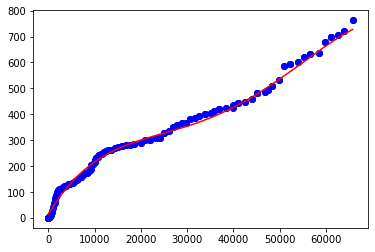

0.9944168771958256
ME
[[ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.77563088]
 [ -1.72861865]
 [ -1.72861865]
 [ -1.54061289]
 [ -1.11785359]
 [ -0.88314015]
 [ -0.27340149]
 [  0.28876472]
 [  0.66318073]
 [  0.85027932]
 [  1.5045446 ]
 [  2.57742217]
 [

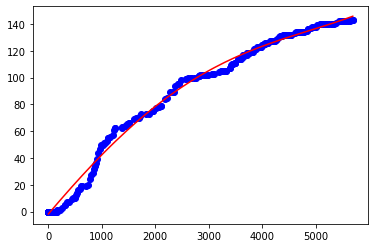

0.9951933833384826
NH
[[  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.12011363]
 [  1.11837694]
 [  1.11667647]
 [  1.11667647]
 [  1.11667647]
 [  1.11667647]
 [  1.11667647]
 [  1.11338423]
 [  1.11338423]
 [  1.11179245]
 [  1.11179245]
 [  1.11023687]
 [  1.11023687]
 [  1.11023687]
 [  1.10036134]
 [  1.09551399]
 [  1.08672137]
 [  1.07918119]
 [  1.07790266]
 [  1.07825602]
 [  1.08234979]
 [  1.09303329]
 [

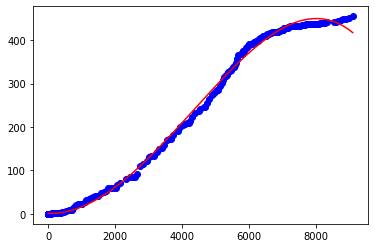

0.9977715254519844
HI
[[  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.22370278]
 [  1.24585457]
 [  1.24585457]
 [  1.24585457]
 [  1.24585457]
 [  1.24585457]
 [  1.24585457]
 [  1.26799669]
 [  1.26799669]
 [  1.37856228]
 [  1.44478573]
 [  1.44478573]
 [  1.44478573]
 [  1.66490394]
 [  2.03689931]
 [  2.27612805]
 [  2.27612805]
 [

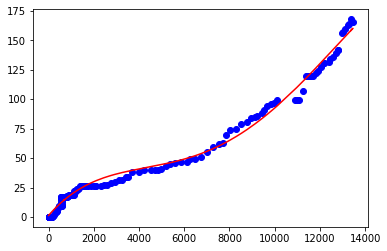

0.9921618720801385
MT
[[  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.25709452]
 [  3.27400438]
 [  3.27400438]
 [  3.27400438]
 [  3.27400438]
 [  3.37542408]
 [  3.37542408]
 [  3.44299969]
 [  3.45988891]
 [  3.51054534]
 [  3.61180771]
 [  3.71300287]
 [  3.83097913]
 [

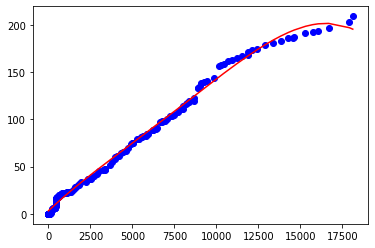

0.9940968577800894
AK
[[ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.17669534]
 [ 1.19614271]
 [ 1.19614271]
 [ 1.19614271]
 [ 1.19614271]
 [ 1.23499651]
 [ 1.29317499]
 [ 1.35123097]
 [ 1.40916462]
 [ 1.4477192 ]
 [ 1.6013958 ]
 [ 1.86825276]
 [ 1.9818146 ]
 [ 2.30096534]
 [ 2.48691039]
 [ 

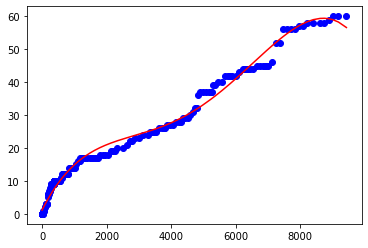

0.9894470269782513


In [ ]:
from sklearn.preprocessing import PolynomialFeatures 

for s in states:
    print(s)
    newdf = corona[corona['state'] == s]
    X = newdf[['tot_cases']]
    y = newdf[['tot_death']]
    
    poly = PolynomialFeatures(degree = 4) 
    
    X_poly = poly.fit_transform(X)
  
    poly.fit(X_poly, y) 
    lin2 = LinearRegression() 
    lin2.fit(X_poly, y)

    y_pred_poly = lin2.predict(X_poly)
    print(y_pred_poly)
    
    plt.scatter(X, y, color ='b')
    plt.plot(X, lin2.predict(X_poly), color = 'red')
    plt.show()
    
    print(lin2.score(X_poly, y))

In [ ]:
clusterframe = corona[['tot_cases', 'conf_cases', 'prob_cases', 'new_case', 'pnew_case', 'tot_death', 'conf_death', 'prob_death', 'new_death', 'pnew_death']]
clusterframe = clusterframe.fillna(0)
clusterframe

,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
0,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
1,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
2,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
3,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
4,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
15775,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
15776,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
15777,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
15778,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
#clusterframe[['state']] = clusterframe[['state']].apply(le.fit_transform)

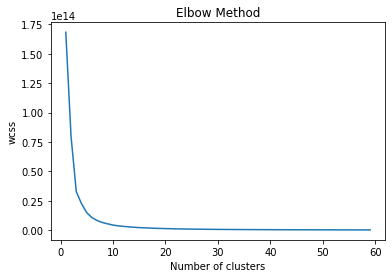

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


wcss = []
for i in range(1,60):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(clusterframe)
    wcss.append(km.inertia_)
plt.plot(range(1,60),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(clusterframe)

In [ ]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

X = pd.DataFrame(scale(clusterframe), index=clusterframe.index, columns=clusterframe.columns)

pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, columns=X.columns)

pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), index=X.index)

pca.explained_variance_ratio_

array([0.37781601, 0.16749469, 0.11955383, 0.11506981, 0.07952102,
       0.05453327, 0.03649473, 0.02996155, 0.01605453, 0.00350055])

([<matplotlib.axis.XTick at 0x7fb99c89f048>,
 <a list of 10 Text major ticklabel objects>)

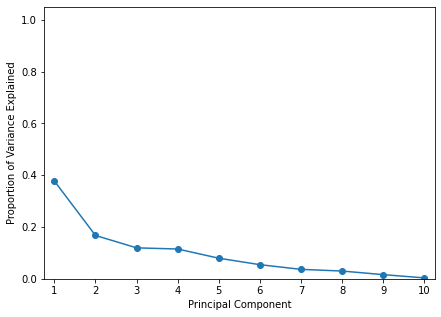

In [ ]:
# Draw the components' varience.
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7,8,9,10], pca.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,10.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6,7,8,9,10])

In [ ]:
df_plot_new = df_plot[df_plot.columns[0:2]]
df_plot_new.columns = ['principal component 1', 'principal component 2']

df_plot_new = pd.concat([df_plot_new, corona['state']], axis=1)

df_plot_new

,principal component 1,principal component 2,state
0,-0.98616,-0.214096,CO
1,-0.98616,-0.214096,CO
2,-0.98616,-0.214096,CO
3,-0.98616,-0.214096,CO
4,-0.98616,-0.214096,CO
...,...,...,...
15775,-0.98616,-0.214096,PW
15776,-0.98616,-0.214096,PW
15777,-0.98616,-0.214096,PW
15778,-0.98616,-0.214096,PW


In [ ]:
km = KMeans(n_clusters=5,init='k-means++', max_iter=300, n_init=10)
y_means = km.fit_predict(X)

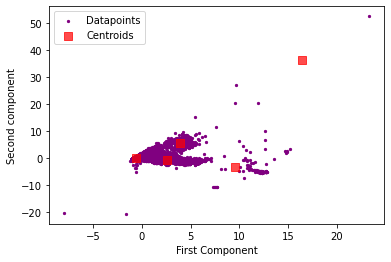

In [ ]:
df_plot_new = np.array(df_plot_new)
plt.scatter(df_plot_new[:,0],df_plot_new[:,1],s=5, c='purple',label='Datapoints')

centroid1 = pd.DataFrame(df_plot_new[y_means==0]).drop([2], axis=1).mean().to_dict()
centroid2 = pd.DataFrame(df_plot_new[y_means==1]).drop([2], axis=1).mean().to_dict()
centroid3 = pd.DataFrame(df_plot_new[y_means==2]).drop([2], axis=1).mean().to_dict()
centroid4 = pd.DataFrame(df_plot_new[y_means==3]).drop([2], axis=1).mean().to_dict()
centroid5 = pd.DataFrame(df_plot_new[y_means==4]).drop([2], axis=1).mean().to_dict()
cent = pd.DataFrame([centroid1,centroid2,centroid3,centroid4,centroid5])

plt.scatter(cent[0], cent[1],s=60,marker='s', c='red', alpha=0.7, label='Centroids')
plt.xlabel('First Component')
plt.ylabel('Second component')
plt.legend()
plt.show()

CO
     submission_date
119         20200520
5.709388185654008


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


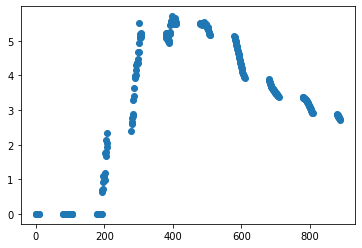

FL
     submission_date
310         20200309
311         20200310
10.526315789473683


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


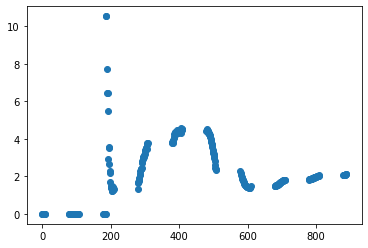

AZ
     submission_date
645         20200520
5.014432436060952


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


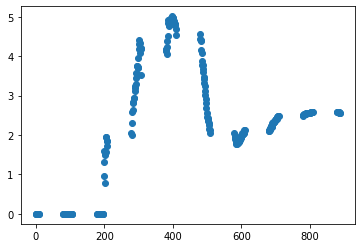

SC
     submission_date
902         20200514
4.53046770057394


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


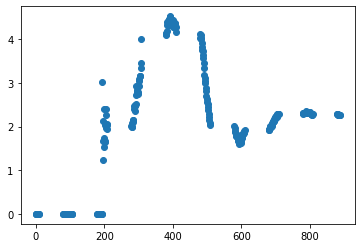

CT
      submission_date
1208         20200626
9.351049740550165


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


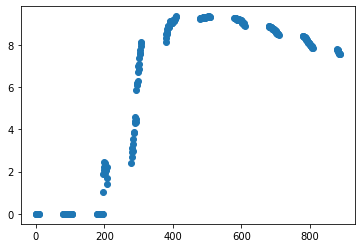

NE
      submission_date
1392         20200408
2.676864244741874


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


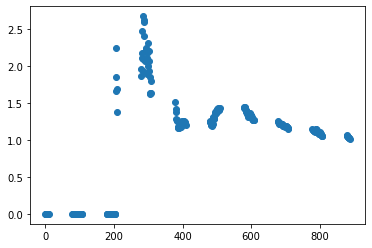

KY
      submission_date
1653         20200406
5.853174603174603


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


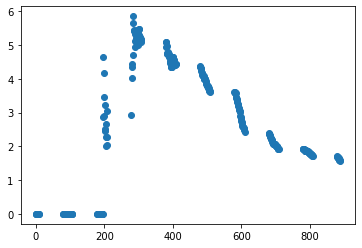

WY
      submission_date
1971         20200531
1.8826135105204873


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


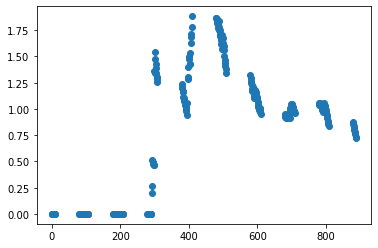

IA
      submission_date
2191         20200418
2.9446876243533624


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


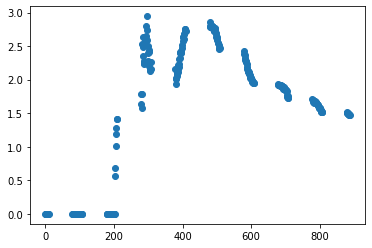

NM
      submission_date
2498         20200601
4.6410256410256405


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


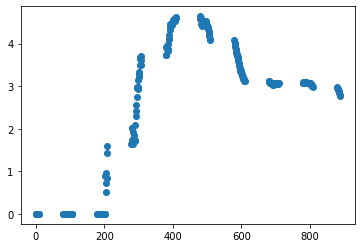

ND
      submission_date
2698         20200330
2.7522935779816518


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


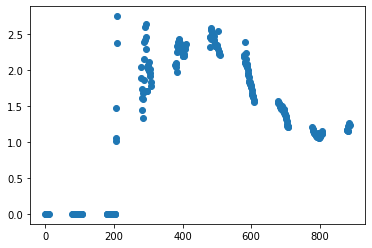

WA
      submission_date
2933         20200302
2934         20200303
33.33333333333333


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


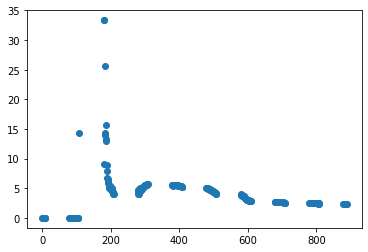

TN
      submission_date
3503         20200415
2.2960932145305004


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


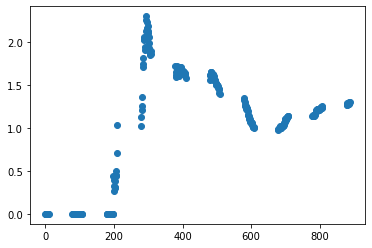

MA
      submission_date
4115         20200710
7.466474664746647


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


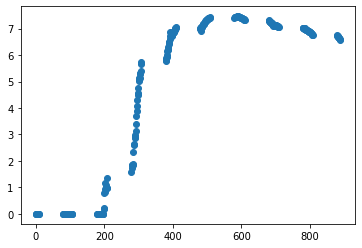

PA
      submission_date
4355         20200617
7.927862804726058


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


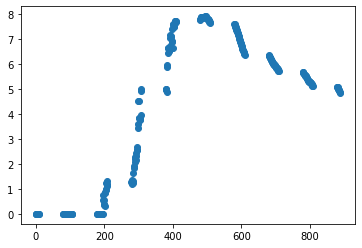

NYC
      submission_date
4578         20200508
11.188850902399963


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


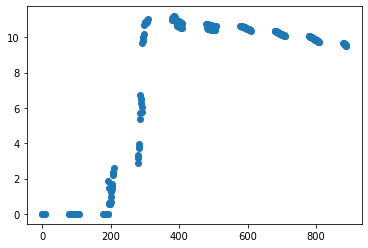

OH
      submission_date
4868         20200604
6.2738050533769645


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


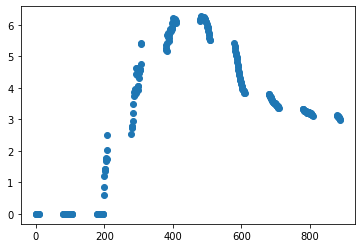

AL
      submission_date
5110         20200514
4.189451402363733


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


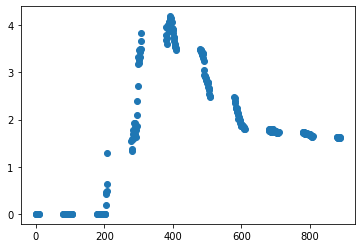

VA
      submission_date
5366         20200507
5367         20200508
3.6344105272580793


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


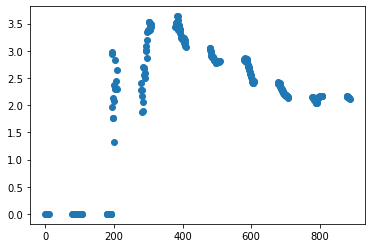

MI
      submission_date
5635         20200513
9.741480853877787


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


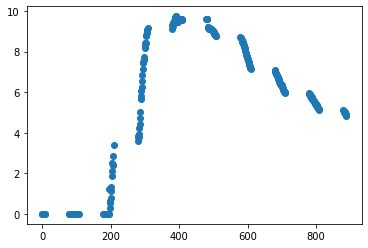

MS
      submission_date
5912         20200527
4.814917895908712


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


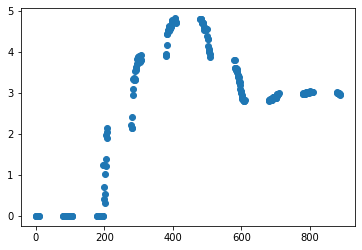

CA
      submission_date
6164         20200516
4.172255283684711


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


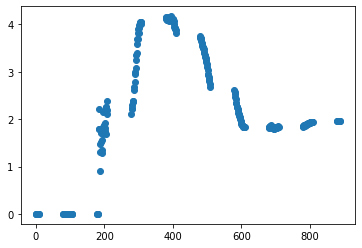

IL
      submission_date
6466         20200624
4.997850078830443


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


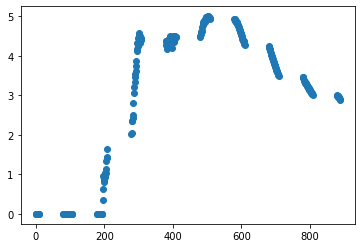

TX
      submission_date
6689         20200515
2.814283817868047


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


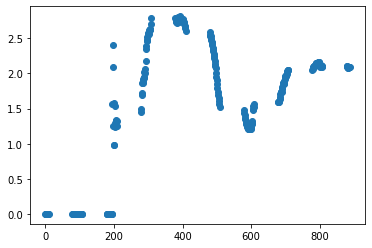

WI
      submission_date
6928         20200421
5.238095238095238


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


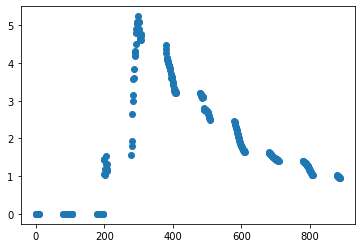

NJ
      submission_date
7280         20200719
8.88433842620614


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


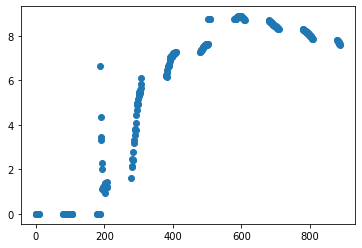

NV
      submission_date
7483         20200520
5.485937064884433


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


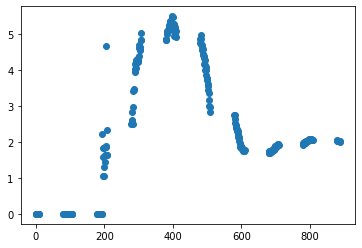

LA
      submission_date
7746         20200520
7.359124128784672


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


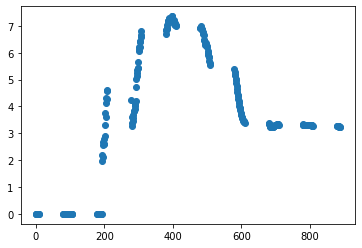

GA
      submission_date
8020         20200531
4.365121572464847


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


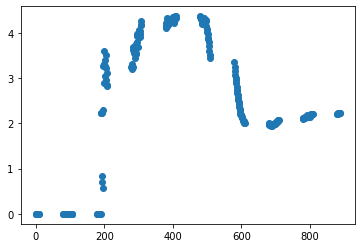

PR
      submission_date
8214         20200323
6.451612903225806


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


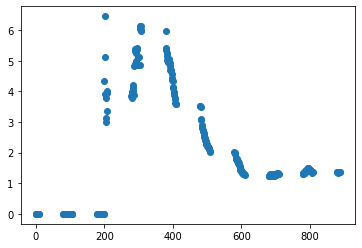

OK
      submission_date
8517         20200502
6.180212931706051


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


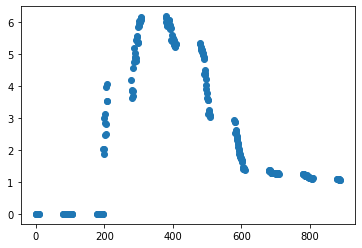

IN
      submission_date
8734         20200317
6.666666666666667


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


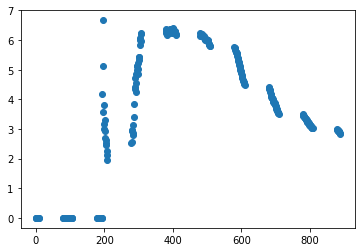

NC
      submission_date
9049         20200508
3.8001153735217765


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


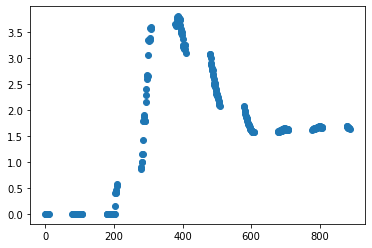

OR
      submission_date
9302         20200428
4.150943396226415


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


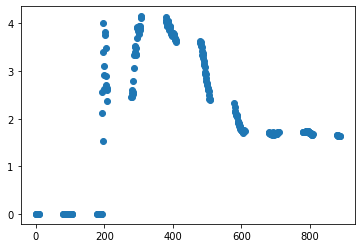

NY
      submission_date
9616         20200618
4.910028653295129


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


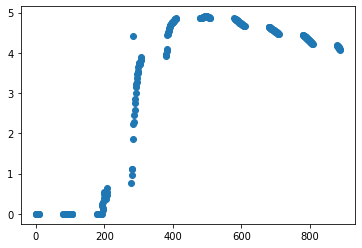

MD
      submission_date
9829         20200429
5.243307883359397


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


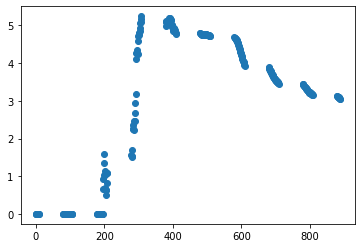

ID
       submission_date
10093         20200430
3.1265508684863526


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


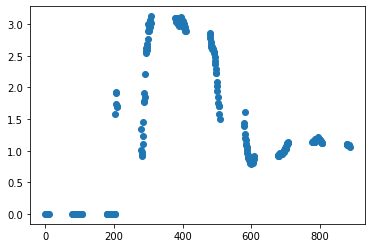

AR
       submission_date
10362         20200506
2.4093049016892825


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


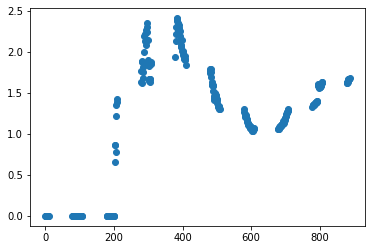

UT
       submission_date
10646         20200527
1.2024957458876915


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


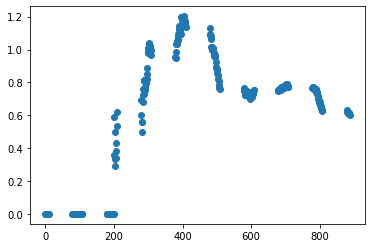

MO
       submission_date
10912         20200530
5.948156148742479


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


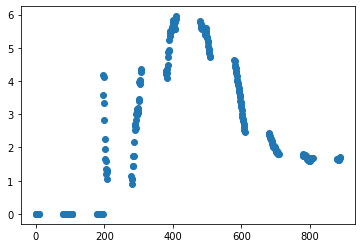

DE
       submission_date
11198         20200622
4.646446021941551


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


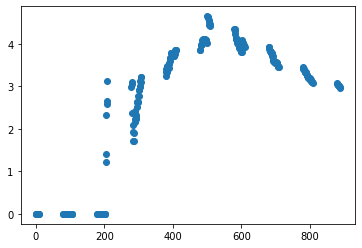

MN
       submission_date
11404         20200426
7.551360355358135


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


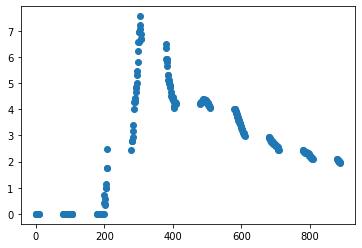

WV
       submission_date
11689         20200518
4.527296937416778


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


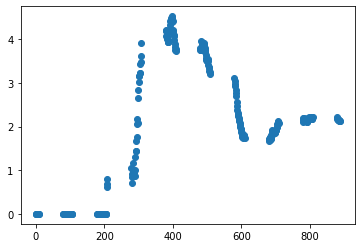

RI
       submission_date
11996         20200701
5.67258054945707


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


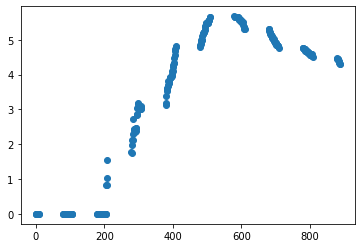

DC
       submission_date
12215         20200518
5.392022008253095


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


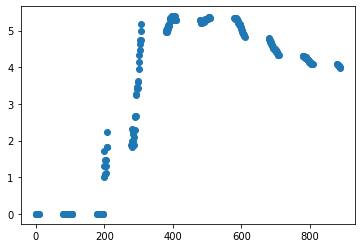

SD
       submission_date
12410         20200311
12411         20200312
12.5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


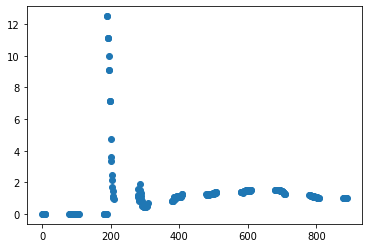

KS
       submission_date
12674         20200312
25.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


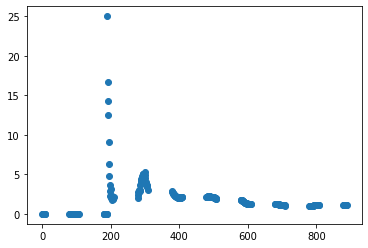

ME
       submission_date
12981         20200425
5.05050505050505


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


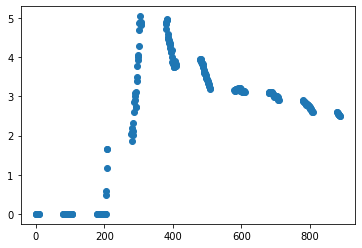

NH
       submission_date
13320         20200710
6.509764646970456


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


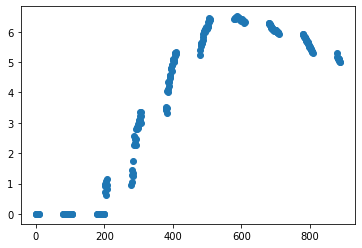

HI
       submission_date
13515         20200503
3.052064631956912


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


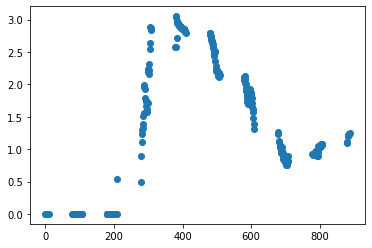

MT
       submission_date
13801         20200526
3.549060542797495


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


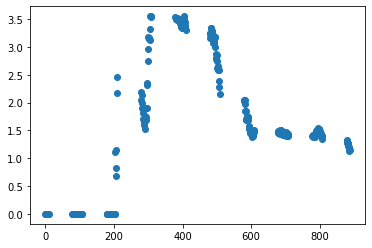

AK
       submission_date
14013         20200405
3.2432432432432434


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


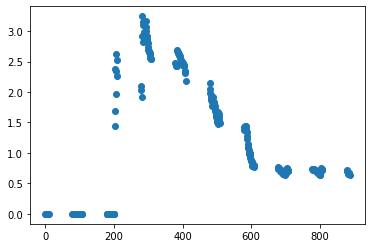

In [ ]:
import numpy as np



for s in states:
    print(s)
    newdf1 = corona[corona['state'] == s]
    one = np.where(newdf1['tot_death'] < 1, newdf1['tot_death'], (newdf1['tot_death']/newdf1['tot_cases'])*100)

    newdf1['death_ratio'] = np.where(newdf1['tot_death'] < 1, newdf1['tot_death'], (newdf1['tot_death']/newdf1['tot_cases'])*100)

    maxdate = newdf1[newdf1.death_ratio == newdf1.death_ratio.max() ]
    highrat = newdf1.death_ratio.max()
    maxdate = str(maxdate[['submission_date']])
    print(maxdate)
    print(highrat)

    result = np.where(one == np.amax(one))
    result = result[0]
    #print(newdf1)

    dates = newdf1['submission_date']
    datesnew = dates - dates.iloc[0]
    

    plt.scatter(datesnew, one)
    plt.show()
    newdf1.sort_values(by=['death_ratio'])